In [1]:
from collections import defaultdict
import glob
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

from msaris.reader.reader import load_data
from msaris.reader.preprocessing import filter_intensities, reduce_data_resolution
from msaris.molecule.molecule import Molecule
from msaris.clusterisation.clusterisation import ClusterSearch, MaxClustering
from msaris.search.optimization_search import SearchClusters
from msaris.utils.intensities_util import norm
from msaris.utils.recognizing_utils import formal_formula

In [85]:
file_name = "PdCl2_pos_maxis_3"
DATA_SOURCE = f"./data/{file_name}.mzML"

In [86]:
#original data and processed
mz, it = load_data(
    DATA_SOURCE, range_spectrum=(100, 1500), min_intensity=100, mz_binning_width=5.0,
)
mz_processed, it_processed = reduce_data_resolution(mz, it, mz.shape[0], it.shape[0])

In [87]:
# Finding clusters
# ClusterSearch is far more computationally intensive
# while 

# clust = ClusterSearch(
#             resolution = 10 ** 5,
#             charge = 1,
#             min_peaks = 1,
#             cluster_width = 8,
#             tolerance = 0.2,
#             threshold = max(it)/500,
#             cluster_min_dist = 5,  # TODO: add support for CI
#         )
# masses_ = clust.find(mz_processed, it_processed)
clust = MaxClustering(
    window=5,
    threshold = max(it)/1000
)
masses_ = clust.find(mz_processed, it_processed)

In [45]:
#original idea to perform calculations based on the 
#provides ability to calculate some ions which 
#can be missed otherwise
initial_params = dict(
    no_TBAB=True,
    no_K=True,
    no_MeOH=True,
    no_Cu=False,
    no_Pd1=False,
    no_Pd=False,
    no_NaTFA=True,
    no_OH=True,
    no_H2O=True,
    no_O2=True,
    no_O=True,
    no_N2=True,
    no_Na=True,
    no_CH3CN=True,
)
iteration_steps = dict(
    no_Cu=True,
    no_Pd=True,
    no_Na=False,
    no_CH3CN=False,
    no_NaTFA=False,
    no_H2O=False,
    no_MeOH=False,
    no_TBAB=False,
    no_O2=False,
    no_O=False,
    no_N2=False,
)

In [88]:
# Calculation can take far too long, hence it can be 
# sped up by loading already calculated molecules
ions_path = "./ions/"
#calculated_ions = {}
for entry in tqdm(glob.glob(f"{ions_path}*.json")):
    m = entry.split(".json")[0].split("/")[2]
    if m not in calculated_ions:
        mol = Molecule()
        mol.load(entry)
        calculated_ions[mol.formula] = mol

  0%|          | 0/9818 [00:00<?, ?it/s]

Here is custom script to achieve and process calculated molecules
In future it would be calculated in script

In [89]:
ranked = defaultdict(list)
srch = SearchClusters(
    mz=mz,
    it=it,
    charge = 1,
    threshold = 0.7
)
path = f"./data/{file_name}"
for target_mass in tqdm(sorted(masses_)):
    found = []
    for to_change, value in iteration_steps.items():
        params = initial_params.copy()
        params[to_change] = value
        found.extend(srch.recognise_masses(
                    target_mass,
                    params,
                    epsilon_range =(0, 5, 0.25,), # due high mistakes I decided to take such big range
                    calculated_ions=calculated_ions,
                    ions_path = ions_path
                ))
    ranked[target_mass] = sorted(found, key=lambda x: x["delta"])  
    

  0%|          | 0/101 [00:00<?, ?it/s]

status: 1, Optimal
Delta m/z: 2.747000000000014
Average mass = 141.87
Brutto formula: Cl1Pd1
status: 1, Optimal
Delta m/z: -1.7150000000000034
Average mass = 162.542
Brutto formula: Cl1Cu2
status: 1, Optimal
Delta m/z: -4.3764
Average mass = 159.88060000000002
Brutto formula: Cl1H2O1Pd1
status: 1, Optimal
Delta m/z: 4.117200000000004
Average mass = 177.89120000000003
Brutto formula: Cl1H4O2Pd1
status: 1, Optimal
Delta m/z: 0.12220000000000653
Average mass = 173.89620000000002
Brutto formula: C1Cl1H4O1Pd1
status: 1, Optimal
Delta m/z: -3.8978999999999964
Average mass = 169.8761
Brutto formula: Cl1N2Pd1
status: 1, Optimal
Delta m/z: 0.5755000000000052
Average mass = 182.8965
Brutto formula: C2Cl1H3N1Pd1
status: 1, Optimal
Delta m/z: -1.7683999999999962
Average mass = 180.5526
Brutto formula: Cl1Cu2H2O1
status: 1, Optimal
Delta m/z: 2.0110999999999954
Average mass = 190.5481
Brutto formula: Cl1Cu2N2
status: 1, Optimal
Delta m/z: -3.187000000000012
Average mass = 197.992
Brutto formula: Cl

status: 1, Optimal
Delta m/z: -2.4334999999999667
Average mass = 324.7665
Brutto formula: C2Cl2H3N1Pd2
status: 1, Optimal
Delta m/z: -4.2809999999999775
Average mass = 322.919
Brutto formula: C4Cl2Cu1H6N2Pd1
status: 1, Optimal
Delta m/z: 3.7190000000000225
Average mass = 330.919
Brutto formula: Cl2Cu1H10O5Pd1
status: 1, Optimal
Delta m/z: -1.1031999999999869
Average mass = 326.09680000000003
Brutto formula: C4Cl2Cu2H16O4
status: 1, Optimal
Delta m/z: -1.609599999999972
Average mass = 325.59040000000005
Brutto formula: C2Cl2Cu3H8O2
status: 1, Optimal
Delta m/z: 0.6350300000000306
Average mass = 327.83503
Brutto formula: Cl1Cu1O1Pd2
status: 1, Optimal
Delta m/z: -2.2059000000000033
Average mass = 324.9941
Brutto formula: Cl3Cu3N2
status: 1, Optimal
Delta m/z: 4.346499999999978
Average mass = 338.0145
Brutto formula: C2Cl3Cu3H3N1
status: 1, Optimal
Delta m/z: 0.29936999999998193
Average mass = 333.96737
Brutto formula: C2Cl2Cu2F3Na1O2
status: 1, Optimal
Delta m/z: -0.0875999999999948
Aver

status: 1, Optimal
Delta m/z: -0.7655000000000172
Average mass = 401.56050000000005
Brutto formula: C2Cl3Cu4H3N1
status: 1, Optimal
Delta m/z: -1.0830000000000126
Average mass = 401.24300000000005
Brutto formula: C4Cl3H6N2Pd2
402.326: Pd2Cl3(CH3CN)2 0.5138227683930423
status: 1, Optimal
Delta m/z: -4.812630000000013
Average mass = 397.51337
Brutto formula: C2Cl2Cu3F3Na1O2
status: 1, Optimal
Delta m/z: -1.579399999999989
Average mass = 400.74660000000006
Brutto formula: Cl3Cu1H2O1Pd2
status: 1, Optimal
Delta m/z: -1.3289999999999793
Average mass = 400.99700000000007
Brutto formula: C5Cl2Cu1H20O5Pd1
status: 1, Optimal
Delta m/z: -2.378199999999996
Average mass = 399.94780000000003
Brutto formula: Cl2Cu3O2Pd1
status: 1, Optimal
Delta m/z: 2.3030300000000015
Average mass = 404.62903
Brutto formula: Cl2Cu5O1
status: 1, Optimal
Delta m/z: 0.99209999999999
Average mass = 403.3181
Brutto formula: Cl4Cu2N2Pd1
status: 1, Optimal
Delta m/z: 3.938539999999989
Average mass = 413.86753999999996
Brut

status: 1, Optimal
Delta m/z: -2.374199999999991
Average mass = 442.82180000000005
Brutto formula: Cl2Cu2O2Pd2
status: 1, Optimal
Delta m/z: -3.5869700000000275
Average mass = 441.60903
Brutto formula: Cl3O1Pd3
status: 1, Optimal
Delta m/z: 0.9960999999999807
Average mass = 446.1921
Brutto formula: Cl4Cu1N2Pd2
status: 1, Optimal
Delta m/z: 1.4347699999999861
Average mass = 454.42377000000005
Brutto formula: Cl5Cu4Na1
status: 1, Optimal
Delta m/z: -3.2615000000000123
Average mass = 449.72749999999996
Brutto formula: C14Cl1Cu2H21N7
status: 1, Optimal
Delta m/z: -0.14139999999996178
Average mass = 452.8476
Brutto formula: C2Cl3Cu2F3O2Pd1
status: 1, Optimal
Delta m/z: -0.9298000000000002
Average mass = 452.0592
Brutto formula: C4Cl1Cu3F6O4
status: 1, Optimal
Delta m/z: 1.2182000000000315
Average mass = 454.2072
Brutto formula: Cl4Cu1H4O2Pd2
status: 1, Optimal
Delta m/z: -2.4019999999999726
Average mass = 450.587
Brutto formula: Cl3Cu4H10O5
status: 1, Optimal
Delta m/z: -2.9731999999999914


status: 1, Optimal
Delta m/z: 0.4528000000000212
Average mass = 493.0498
Brutto formula: Cl4O2Pd3
status: 1, Optimal
Delta m/z: -1.0771999999999515
Average mass = 491.5198
Brutto formula: Cl4Cu5O2
status: 1, Optimal
Delta m/z: 2.2732000000000525
Average mass = 494.8702
Brutto formula: Cl4Cu3N4Pd1
status: 1, Optimal
Delta m/z: -3.5308999999999493
Average mass = 489.0661
Brutto formula: Cl4N2Pd3
status: 1, Optimal
Delta m/z: -0.41922999999997046
Average mass = 497.29777000000007
Brutto formula: Cl5Cu3Na1Pd1
status: 1, Optimal
Delta m/z: 0.6745000000000232
Average mass = 498.3915
Brutto formula: C6Cl4Cu2H9N3Pd1
status: 1, Optimal
Delta m/z: -0.46602999999993244
Average mass = 497.25097000000005
Brutto formula: C4Cl1F6Na1O4Pd2
status: 1, Optimal
Delta m/z: -1.2076299999999804
Average mass = 496.50937
Brutto formula: C2Cl3Cu4F3Na1O2
status: 1, Optimal
Delta m/z: -1.9953999999999468
Average mass = 495.72159999999997
Brutto formula: C2Cl3Cu1F3O2Pd2
status: 1, Optimal
Delta m/z: -2.78379999999

status: 1, Optimal
Delta m/z: -2.3655999999999437
Average mass = 523.5824
Brutto formula: C2Cl4Cu5H8O2
status: 1, Optimal
Delta m/z: -4.7765999999999735
Average mass = 521.1714000000001
Brutto formula: C7Cl3Cu3H28O7
status: 1, Optimal
Delta m/z: 0.23800000000004218
Average mass = 526.186
Brutto formula: Br1Cl3Cu2Pd2
status: 1, Optimal
Delta m/z: 1.021800000000038
Average mass = 526.9698
Brutto formula: Cl5Cu5O2
status: 1, Optimal
Delta m/z: -4.80219999999996
Average mass = 521.1458
Brutto formula: Cl3Cu1O2Pd3
status: 1, Optimal
Delta m/z: -0.12096999999993407
Average mass = 525.82703
Brutto formula: Cl3Cu3O1Pd2
status: 1, Optimal
Delta m/z: -1.4318999999999882
Average mass = 524.5161
Brutto formula: Cl5N2Pd3
status: 1, Optimal
Delta m/z: -2.9619000000000177
Average mass = 522.9861
Brutto formula: Cl5Cu5N2
status: 1, Optimal
Delta m/z: -0.7836899999999503
Average mass = 535.85331
Brutto formula: Cl6Cu4Na3
status: 1, Optimal
Delta m/z: -1.5714599999999166
Average mass = 535.06554
Brutto 

status: 1, Optimal
Delta m/z: -4.78000000000003
Average mass = 549.5830000000001
Brutto formula: Cl4Cu5H10O5
status: 1, Optimal
Delta m/z: -1.1654000000000337
Average mass = 553.1976000000001
Brutto formula: C8Cl3Cu3H32O8
status: 1, Optimal
Delta m/z: -4.589200000000005
Average mass = 549.7738
Brutto formula: C9Cl2Cu3H36O9
status: 1, Optimal
Delta m/z: 0.7027999999999643
Average mass = 555.0658
Brutto formula: Cl4Cu6O2
status: 1, Optimal
Delta m/z: -0.509970000000072
Average mass = 553.85303
Brutto formula: Cl5Cu4O1Pd1
status: 1, Optimal
Delta m/z: -1.8408000000000655
Average mass = 552.5222
Brutto formula: Cl5N4Pd3
status: 1, Optimal
Delta m/z: -3.211000000000041
Average mass = 560.056
Brutto formula: Cl5Cu1Pd3
status: 1, Optimal
Delta m/z: 0.5179999999999723
Average mass = 563.785
Brutto formula: C4Cl4Cu2H6N2Pd2
status: 1, Optimal
Delta m/z: -1.3295000000000528
Average mass = 561.9375
Brutto formula: C6Cl4Cu3H9N3Pd1
status: 1, Optimal
Delta m/z: -3.9994000000000227
Average mass = 559

status: 1, Optimal
Delta m/z: -4.158600000000007
Average mass = 581.2344
Brutto formula: C2Cl5Cu2H8O2Pd2
status: 1, Optimal
Delta m/z: -3.085000000000008
Average mass = 582.308
Brutto formula: Br1Cl4Cu4Pd1
status: 1, Optimal
Delta m/z: -1.9139700000000115
Average mass = 583.47903
Brutto formula: Cl4O1Pd4
status: 1, Optimal
Delta m/z: -3.443969999999984
Average mass = 581.94903
Brutto formula: Cl4Cu5O1Pd1
status: 1, Optimal
Delta m/z: 1.0492000000000061
Average mass = 586.4422000000001
Brutto formula: Cl6Cu5N4
status: 1, Optimal
Delta m/z: 1.4320000000000448
Average mass = 593.9760000000001
Brutto formula: Cl6Cu6
status: 1, Optimal
Delta m/z: 0.9613100000000827
Average mass = 593.50531
Brutto formula: Cl7Cu1Na3Pd2
status: 1, Optimal
Delta m/z: -1.35645999999997
Average mass = 591.18754
Brutto formula: Cl7Cu3Na2Pd1
status: 1, Optimal
Delta m/z: 1.1145000000000493
Average mass = 593.6585
Brutto formula: C2Cl6Cu2H3N1Pd2
status: 1, Optimal
Delta m/z: -2.7939999999999827
Average mass = 589.7

status: 1, Optimal
Delta m/z: -4.742999999999938
Average mass = 608.754
Brutto formula: Cl7Cu4Pd1
status: 1, Optimal
Delta m/z: 0.8335000000000434
Average mass = 614.3305
Brutto formula: C2Cl6Cu4H3N1Pd1
status: 1, Optimal
Delta m/z: -1.0139999999999247
Average mass = 612.4830000000001
Brutto formula: C4Cl6Cu5H6N2
status: 1, Optimal
Delta m/z: -0.10808999999997582
Average mass = 613.3889099999999
Brutto formula: C2Cl5Cu4F3Na3O2
status: 1, Optimal
Delta m/z: -0.8958599999999421
Average mass = 612.60114
Brutto formula: C2Cl5Cu1F3Na2O2Pd2
status: 1, Optimal
Delta m/z: -1.684259999999938
Average mass = 611.81274
Brutto formula: C4Cl3Cu2F6Na2O4Pd1
status: 1, Optimal
Delta m/z: -2.4726599999999053
Average mass = 611.02434
Brutto formula: C6Cl1Cu3F9Na2O6
status: 1, Optimal
Delta m/z: -3.213629999999938
Average mass = 610.28337
Brutto formula: C2Cl5Cu3F3Na1O2Pd1
status: 1, Optimal
Delta m/z: -3.2604299999998716
Average mass = 610.23657
Brutto formula: C6Cl1F9Na1O6Pd2
status: 1, Optimal
Delta m/

status: 1, Optimal
Delta m/z: -4.624919999999975
Average mass = 629.7430800000001
Brutto formula: Cl8Cu4Na4
status: 1, Optimal
Delta m/z: 0.31699999999997885
Average mass = 634.6850000000001
Brutto formula: C4Cl6Cu2H6N2Pd2
status: 1, Optimal
Delta m/z: -3.591500000000053
Average mass = 630.7765
Brutto formula: C18Cl2Cu3H27N9
status: 1, Optimal
Delta m/z: -1.1416600000000585
Average mass = 633.2263399999999
Brutto formula: C6Cl1F9Na2O6Pd2
status: 1, Optimal
Delta m/z: -1.8832600000000639
Average mass = 632.4847400000001
Brutto formula: C4Cl3Cu4F6Na2O4
status: 1, Optimal
Delta m/z: -2.6710299999999734
Average mass = 631.6969700000001
Brutto formula: C4Cl3Cu1F6Na1O4Pd2
status: 1, Optimal
Delta m/z: -3.4594300000000544
Average mass = 630.9085699999999
Brutto formula: C6Cl1Cu2F9Na1O6Pd1
status: 1, Optimal
Delta m/z: -4.20040000000003
Average mass = 630.1676
Brutto formula: C2Cl5Cu2F3O2Pd2
status: 1, Optimal
Delta m/z: -4.988800000000083
Average mass = 629.3792
Brutto formula: C4Cl3Cu3F6O4Pd

status: 1, Optimal
Delta m/z: -4.10763
Average mass = 653.1573699999999
Brutto formula: C2Cl5Cu2F3Na1O2Pd2
status: 1, Optimal
Delta m/z: -4.896029999999939
Average mass = 652.36897
Brutto formula: C4Cl3Cu3F6Na1O4Pd1
status: 1, Optimal
Delta m/z: -0.18960000000001287
Average mass = 657.0754
Brutto formula: Cl5Cu5H18O9
status: 1, Optimal
Delta m/z: -0.30319999999994707
Average mass = 656.9618
Brutto formula: Cl5H6O3Pd4
status: 1, Optimal
Delta m/z: -0.7607999999999464
Average mass = 656.5042000000001
Brutto formula: Cl6Cu5H14O7
status: 1, Optimal
Delta m/z: -0.8744000000000192
Average mass = 656.3906
Brutto formula: Cl6H2O1Pd4
status: 1, Optimal
Delta m/z: -2.404399999999992
Average mass = 654.8606
Brutto formula: Cl6Cu5H2O1Pd1
status: 1, Optimal
Delta m/z: -2.851000000000056
Average mass = 654.4139999999999
Brutto formula: Cl5Cu3H20O10Pd1
status: 1, Optimal
Delta m/z: -4.4946000000000055
Average mass = 652.7704
Brutto formula: Cl5Cu3H8O4Pd2
status: 1, Optimal
Delta m/z: -0.6239999999999

status: 1, Optimal
Delta m/z: -4.9500000000000455
Average mass = 681.304
Brutto formula: Br1Cl5Cu5Pd1
status: 1, Optimal
Delta m/z: 3.2577999999999996
Average mass = 689.5118
Brutto formula: Cl6Cu7O2
status: 1, Optimal
Delta m/z: -3.7789700000000774
Average mass = 682.4750300000001
Brutto formula: Cl5Cu1O1Pd4
status: 1, Optimal
Delta m/z: -0.7258999999999993
Average mass = 685.5281
Brutto formula: Cl6Cu7N2
status: 1, Optimal
Delta m/z: -0.8158000000000314
Average mass = 685.4382
Brutto formula: Cl7Cu6N4
status: 1, Optimal
Delta m/z: 0.49500000000003297
Average mass = 701.926
Brutto formula: Cl6Cu1Pd4
status: 1, Optimal
Delta m/z: -3.8234600000000682
Average mass = 697.60754
Brutto formula: Cl7Cu3Na2Pd2
status: 1, Optimal
Delta m/z: -4.611230000000063
Average mass = 696.8197700000001
Brutto formula: Cl7Na1Pd4
status: 1, Optimal
Delta m/z: 0.21149999999994407
Average mass = 701.6424999999999
Brutto formula: C10Cl5H15N5Pd3
status: 1, Optimal
Delta m/z: -1.3525000000000489
Average mass = 7

status: 1, Optimal
Delta m/z: -2.245800000000031
Average mass = 715.1272
Brutto formula: C4Cl3Cu1F6O4Pd3
status: 1, Optimal
Delta m/z: -2.987400000000065
Average mass = 714.3856
Brutto formula: C2Cl5Cu5F3O2Pd1
✨ JSON with was created: /home/lily/projects/msaris/ionsC2Cl5Cu5F3O2Pd1.json ✨
status: 1, Optimal
Delta m/z: -3.0342000000000553
Average mass = 714.3388
Brutto formula: C6Cl1Cu2F9O6Pd2
status: 1, Optimal
Delta m/z: -3.458090000000027
Average mass = 713.9149100000001
Brutto formula: C2Cl6F3Na3O2Pd3
status: 1, Optimal
Delta m/z: -3.775800000000004
Average mass = 713.5972
Brutto formula: C4Cl3Cu6F6O4
status: 1, Optimal
Delta m/z: 0.01579999999995607
Average mass = 717.3888
Brutto formula: Cl6Cu4H16O8Pd1
status: 1, Optimal
Delta m/z: -0.5554000000000769
Average mass = 716.8176
Brutto formula: Cl7Cu4H12O6Pd1
status: 1, Optimal
Delta m/z: -1.6278000000000574
Average mass = 715.7452
Brutto formula: Cl6Cu4H4O2Pd2
status: 1, Optimal
Delta m/z: -2.6456000000000017
Average mass = 714.727400

status: 1, Optimal
Delta m/z: 0.07279999999996889
Average mass = 741.3398
Brutto formula: Cl5O2Pd5
status: 1, Optimal
Delta m/z: -1.4572000000001175
Average mass = 739.8097999999999
Brutto formula: Cl5Cu5O2Pd2
status: 1, Optimal
Delta m/z: -2.66997000000004
Average mass = 738.59703
Brutto formula: Cl6Cu3O1Pd3
status: 1, Optimal
Delta m/z: -4.199970000000041
Average mass = 737.06703
Brutto formula: Cl6Cu8O1
status: 1, Optimal
Delta m/z: 1.9130999999999823
Average mass = 743.1801
Brutto formula: Cl7Cu4N2Pd2
status: 1, Optimal
Delta m/z: 0.5885399999999663
Average mass = 746.3055400000001
Brutto formula: Cl9Cu6Na2
status: 1, Optimal
Delta m/z: 0.68100000000004
Average mass = 746.398
Brutto formula: C16Cl4Cu1H24N8Pd2
status: 1, Optimal
Delta m/z: -0.8830000000000382
Average mass = 744.834
Brutto formula: C8Cl5Cu3H12N4Pd2
status: 1, Optimal
Delta m/z: -2.730500000000063
Average mass = 742.9865
Brutto formula: C10Cl5Cu4H15N5Pd1
status: 1, Optimal
Delta m/z: -2.764499999999913
Average mass = 

status: 1, Optimal
Delta m/z: -4.661600000000092
Average mass = 751.7664
Brutto formula: Cl6Cu4H8O4Pd2
status: 1, Optimal
Delta m/z: -0.7909999999999684
Average mass = 755.637
Brutto formula: C5Cl6Cu1H20O5Pd3
status: 1, Optimal
Delta m/z: -1.2973999999999961
Average mass = 755.1306000000001
Brutto formula: C3Cl6Cu2H12O3Pd3
756.428: Cu2Pd3Cl6(CH3OH)3 0.35375503051802193
status: 1, Optimal
Delta m/z: -1.814599999999956
Average mass = 754.6134000000001
Brutto formula: C7Cl6Cu5H28O7
status: 1, Optimal
Delta m/z: -2.320999999999941
Average mass = 754.1070000000001
Brutto formula: C5Cl6Cu6H20O5
status: 1, Optimal
Delta m/z: -2.827399999999969
Average mass = 753.6006
Brutto formula: C3Cl6Cu7H12O3
status: 1, Optimal
Delta m/z: -4.214799999999997
Average mass = 752.2132
Brutto formula: C6Cl5Cu1H24O6Pd3
status: 1, Optimal
Delta m/z: -4.731999999999971
Average mass = 751.696
Brutto formula: C10Cl5Cu4H40O10
status: 1, Optimal
Delta m/z: -2.64399999999992
Average mass = 753.7840000000001
Brutto for

status: 1, Optimal
Delta m/z: -1.703599999999966
Average mass = 771.8024
Brutto formula: C2Cl8Cu5H8O2Pd1
status: 1, Optimal
Delta m/z: -3.597399999999922
Average mass = 769.9086
Brutto formula: C3Cl7H12O3Pd4
status: 1, Optimal
Delta m/z: -4.103799999999993
Average mass = 769.4022
Brutto formula: C1Cl7Cu1H4O1Pd4
status: 1, Optimal
Delta m/z: -4.620999999999981
Average mass = 768.885
Brutto formula: C5Cl7Cu4H20O5Pd1
status: 1, Optimal
Delta m/z: -0.791799999999995
Average mass = 772.7142000000001
Brutto formula: C16Cl6Cu5H36N1
status: 1, Optimal
Delta m/z: -4.14019999999994
Average mass = 769.3658
Brutto formula: Cl7Cu1O2Pd4
status: 1, Optimal
Delta m/z: -0.9889699999999433
Average mass = 772.51703
Brutto formula: Cl7Cu8O1
status: 1, Optimal
Delta m/z: -2.3197999999999936
Average mass = 771.1861999999999
Brutto formula: Cl7Cu4N4Pd2
status: 1, Optimal
Delta m/z: 3.920000000000016
Average mass = 791.9680000000001
Brutto formula: Cl8Cu8
status: 1, Optimal
Delta m/z: 0.34377000000000635
Aver

status: 1, Optimal
Delta m/z: -3.202200000000005
Average mass = 800.4048
Brutto formula: C4Cl7Cu5H16O4Pd1
status: 1, Optimal
Delta m/z: -3.7085999999999615
Average mass = 799.8983999999999
Brutto formula: C2Cl7Cu6H8O2Pd1
status: 1, Optimal
Delta m/z: 0.313199999999938
Average mass = 803.9202
Brutto formula: Br1C16Cl4Cu2H36N1Pd2
status: 1, Optimal
Delta m/z: -1.104999999999933
Average mass = 802.5020000000001
Brutto formula: Br1Cl6Cu3Pd3
status: 1, Optimal
Delta m/z: -0.3211999999999229
Average mass = 803.2858
Brutto formula: Cl8Cu6O2Pd1
status: 1, Optimal
Delta m/z: -1.463969999999966
Average mass = 802.1430300000001
Brutto formula: Cl6Cu4O1Pd3
status: 1, Optimal
Delta m/z: -2.993969999999967
Average mass = 800.61303
Brutto formula: Cl6Cu9O1
status: 1, Optimal
Delta m/z: -2.774899999999949
Average mass = 800.8321000000001
Brutto formula: Cl8Cu1N2Pd4
status: 1, Optimal
Delta m/z: -4.304899999999979
Average mass = 799.3021
Brutto formula: Cl8Cu6N2Pd1
status: 1, Optimal
Delta m/z: -0.7614

status: 1, Optimal
Delta m/z: -1.2869999999999777
Average mass = 815.2420000000001
Brutto formula: C10Cl5Cu5H40O10
status: 1, Optimal
Delta m/z: -1.8526000000000806
Average mass = 814.6764
Brutto formula: C2Cl8Cu4H8O2Pd2
status: 1, Optimal
Delta m/z: -4.252799999999937
Average mass = 812.2762
Brutto formula: C1Cl7H4O1Pd5
status: 1, Optimal
Delta m/z: -4.710799999999949
Average mass = 811.8182
Brutto formula: C11Cl4Cu5H44O11
✨ JSON with was created: /home/lily/projects/msaris/ionsC11Cl4Cu5H44O11.json ✨
status: 1, Optimal
Delta m/z: -4.769999999999925
Average mass = 811.7590000000001
Brutto formula: C5Cl7Cu3H20O5Pd2
status: 1, Optimal
Delta m/z: 0.47740000000004557
Average mass = 817.0064
Brutto formula: C32Cl4Cu3H72N2
status: 1, Optimal
Delta m/z: -0.9408000000000527
Average mass = 815.5881999999999
Brutto formula: C16Cl6Cu4H36N1Pd1
status: 1, Optimal
Delta m/z: 0.07480000000000686
Average mass = 816.6038
Brutto formula: Cl6Cu9O2
status: 1, Optimal
Delta m/z: -4.289199999999941
Average 

status: 1, Optimal
Delta m/z: -1.1374000000000244
Average mass = 860.2066
Brutto formula: Cl10Cu6H2O1Pd1
status: 1, Optimal
Delta m/z: -1.5140000000001521
Average mass = 859.8299999999999
Brutto formula: Cl6Cu4H20O10Pd2
861.344: Cu4Pd2Cl6(H2O)10 0.5060096891970844
status: 1, Optimal
Delta m/z: -2.0852000000000146
Average mass = 859.2588000000001
Brutto formula: Cl7Cu4H16O8Pd2
status: 1, Optimal
Delta m/z: -2.656400000000133
Average mass = 858.6876
Brutto formula: Cl8Cu4H12O6Pd2
status: 1, Optimal
Delta m/z: -3.227600000000038
Average mass = 858.1164000000001
Brutto formula: Cl9Cu4H8O4Pd2
status: 1, Optimal
Delta m/z: -4.175400000000053
Average mass = 857.1686
Brutto formula: Cl6Cu2H22O11Pd3
✨ JSON with was created: /home/lily/projects/msaris/ionsCl6Cu2H22O11Pd3.json ✨
status: 1, Optimal
Delta m/z: -4.746600000000029
Average mass = 856.5974
Brutto formula: Cl7Cu2H18O9Pd3
861.344: Cu2Pd3Cl7(H2O)9 0.5878835931695785
status: 1, Optimal
Delta m/z: 0.1957999999999629
Average mass = 861.53980

status: 1, Optimal
Delta m/z: -0.6268000000000598
Average mass = 886.4882
Brutto formula: C16Cl8Cu4H36N1Pd1
status: 1, Optimal
Delta m/z: -3.452600000000089
Average mass = 883.6624
Brutto formula: Br1C32Cl3H72N2Pd2
status: 1, Optimal
Delta m/z: -4.709000000000032
Average mass = 882.4060000000001
Brutto formula: Br2Cl6Cu3Pd3
status: 1, Optimal
Delta m/z: -4.870800000000031
Average mass = 882.2442000000001
Brutto formula: Br1C16Cl5Cu1H36N1Pd3
status: 1, Optimal
Delta m/z: 0.3887999999999998
Average mass = 887.5038000000001
Brutto formula: Cl8Cu9O2
status: 1, Optimal
Delta m/z: -3.9052000000000113
Average mass = 883.2098
Brutto formula: Cl6O2Pd6
status: 1, Optimal
Delta m/z: -0.8239700000000365
Average mass = 886.29103
Brutto formula: Cl9Cu7O1Pd1
status: 1, Optimal
Delta m/z: -2.15480000000003
Average mass = 884.9602
Brutto formula: Cl9Cu3N4Pd3
status: 1, Optimal
Delta m/z: -3.6848000000000027
Average mass = 883.4302
Brutto formula: Cl9Cu8N4
status: 1, Optimal
Delta m/z: -0.21768999999994

status: 1, Optimal
Delta m/z: -1.701199999999858
Average mass = 925.5788000000001
Brutto formula: C6Cl4Cu7F9O6
status: 1, Optimal
Delta m/z: -2.171889999999962
Average mass = 925.10811
Brutto formula: C6Cl5Cu2F9Na3O6Pd2
status: 1, Optimal
Delta m/z: -2.9602899999999863
Average mass = 924.3197100000001
Brutto formula: C8Cl3Cu3F12Na3O8Pd1
status: 1, Optimal
Delta m/z: -3.7486900000000105
Average mass = 923.5313100000001
Brutto formula: C10Cl1Cu4F15Na3O10
status: 1, Optimal
Delta m/z: -4.489659999999844
Average mass = 922.7903400000001
Brutto formula: C6Cl5Cu4F9Na2O6Pd1
✨ JSON with was created: /home/lily/projects/msaris/ionsC6Cl5Cu4F9Na2O6Pd1.json ✨
status: 1, Optimal
Delta m/z: -4.536459999999806
Average mass = 922.7435400000002
Brutto formula: C10Cl1Cu1F15Na2O10Pd2
status: 1, Optimal
Delta m/z: -0.17019999999988045
Average mass = 927.1098000000001
Brutto formula: Cl7Cu7H26O13
status: 1, Optimal
Delta m/z: -0.29479999999997375
Average mass = 926.9852000000001
Brutto formula: Cl9Cu9H4O2


status: 1, Optimal
Delta m/z: -2.5291999999999746
Average mass = 930.1588
Brutto formula: Cl9Cu4H16O8Pd2
status: 1, Optimal
Delta m/z: -3.601600000000005
Average mass = 929.0864
Brutto formula: Cl8Cu4H8O4Pd3
status: 1, Optimal
Delta m/z: -4.1728000000000165
Average mass = 928.5152
Brutto formula: Cl9Cu4H4O2Pd3
✨ JSON with was created: /home/lily/projects/msaris/ionsCl9Cu4H4O2Pd3.json ✨
status: 1, Optimal
Delta m/z: -0.23740000000002226
Average mass = 932.4506
Brutto formula: C3Cl8Cu2H12O3Pd4
932.688: Cu2Pd4Cl8(CH3OH)3 0.3843285606450235
status: 1, Optimal
Delta m/z: -0.7437999999998652
Average mass = 931.9442000000001
Brutto formula: C1Cl8Cu3H4O1Pd4
✨ JSON with was created: /home/lily/projects/msaris/ionsC1Cl8Cu3H4O1Pd4.json ✨
status: 1, Optimal
Delta m/z: -0.7545999999999822
Average mass = 931.9334
Brutto formula: C7Cl8Cu5H28O7Pd1
status: 1, Optimal
Delta m/z: -1.2609999999999673
Average mass = 931.427
Brutto formula: C5Cl8Cu6H20O5Pd1
status: 1, Optimal
Delta m/z: -1.767399999999995
A

status: 1, Optimal
Delta m/z: -1.2824600000000714
Average mass = 944.2975400000001
Brutto formula: Cl11Cu8Na2
status: 1, Optimal
Delta m/z: -1.7531499999999482
Average mass = 943.8268500000001
Brutto formula: Cl12Cu3Na5Pd2
status: 1, Optimal
Delta m/z: -2.070229999999924
Average mass = 943.5097700000001
Brutto formula: Cl11Cu5Na1Pd2
status: 1, Optimal
Delta m/z: -4.070920000000058
Average mass = 941.5090799999999
Brutto formula: Cl12Cu5Na4Pd1
status: 1, Optimal
Delta m/z: -4.388000000000034
Average mass = 941.192
Brutto formula: Cl11Cu7Pd1
status: 1, Optimal
Delta m/z: -0.6589999999999918
Average mass = 944.921
Brutto formula: C4Cl10Cu8H6N2
status: 1, Optimal
Delta m/z: -0.8725000000000023
Average mass = 944.7075
Brutto formula: C14Cl6Cu7H21N7
status: 1, Optimal
Delta m/z: -1.2239999999999895
Average mass = 944.356
Brutto formula: C8Cl7H12N4Pd5
status: 1, Optimal
Delta m/z: -2.754000000000076
Average mass = 942.826
Brutto formula: C8Cl7Cu5H12N4Pd2
status: 1, Optimal
Delta m/z: -3.07150

status: 1, Optimal
Delta m/z: -0.9963200000001109
Average mass = 949.67468
Brutto formula: C2Cl9F3Na4O2Pd4
status: 1, Optimal
Delta m/z: -1.3608300000000781
Average mass = 949.31017
Brutto formula: C8Cl2Cu3F12Na1O8Pd2
status: 1, Optimal
Delta m/z: -1.784719999999993
Average mass = 948.88628
Brutto formula: C4Cl7Cu1F6Na4O4Pd3
status: 1, Optimal
Delta m/z: -2.1486000000001013
Average mass = 948.5224
Brutto formula: C8Cl2F12O8Pd4
status: 1, Optimal
Delta m/z: -2.573120000000131
Average mass = 948.0978799999999
Brutto formula: C6Cl5Cu2F9Na4O6Pd2
status: 1, Optimal
Delta m/z: -2.890199999999993
Average mass = 947.7808000000001
Brutto formula: C6Cl4Cu4F9O6Pd2
status: 1, Optimal
Delta m/z: -3.3147199999999657
Average mass = 947.3562800000001
Brutto formula: C4Cl7Cu6F6Na4O4
status: 1, Optimal
Delta m/z: -3.678600000000074
Average mass = 946.9924
Brutto formula: C8Cl2Cu5F12O8Pd1
status: 1, Optimal
Delta m/z: -4.1492900000000645
Average mass = 946.52171
Brutto formula: C8Cl3F12Na3O8Pd3
status: 1

status: 1, Optimal
Delta m/z: -1.127999999999929
Average mass = 1011.2810000000001
Brutto formula: C5Cl9H20O5Pd5
status: 1, Optimal
Delta m/z: -1.6344000000000136
Average mass = 1010.7746
Brutto formula: C3Cl9Cu1H12O3Pd5
status: 1, Optimal
Delta m/z: -2.1515999999999735
Average mass = 1010.2574000000001
Brutto formula: C7Cl9Cu4H28O7Pd2
status: 1, Optimal
Delta m/z: -2.6579999999999586
Average mass = 1009.7510000000001
Brutto formula: C5Cl9Cu5H20O5Pd2
status: 1, Optimal
Delta m/z: -3.164400000000043
Average mass = 1009.2446
Brutto formula: C3Cl9Cu6H12O3Pd2
status: 1, Optimal
Delta m/z: -3.6708000000000567
Average mass = 1008.7382
Brutto formula: C1Cl9Cu7H4O1Pd2
status: 1, Optimal
Delta m/z: -4.551799999999986
Average mass = 1007.8571999999999
Brutto formula: C6Cl8H24O6Pd5
status: 1, Optimal
Delta m/z: -1.3810000000000002
Average mass = 1011.028
Brutto formula: Br2Cl6Pd6
status: 1, Optimal
Delta m/z: -4.722799999999893
Average mass = 1007.6862000000001
Brutto formula: C16Cl9Cu2H36N1Pd3
s

status: 1, Optimal
Delta m/z: -4.880969999999882
Average mass = 1029.69103
Brutto formula: Cl10Cu2O1Pd5
status: 1, Optimal
Delta m/z: -0.3177999999998704
Average mass = 1034.2541999999999
Brutto formula: Cl9Cu2N4Pd5
status: 1, Optimal
Delta m/z: -1.8477999999999568
Average mass = 1032.7242
Brutto formula: Cl9Cu7N4Pd2
1034.572: Cu7Pd2Cl9(N2)2 0.5303076850252173
status: 1, Optimal
Delta m/z: -0.1273799999999028
Average mass = 1043.61062
Brutto formula: Cl13Cu7Na6
status: 1, Optimal
Delta m/z: -0.44446000000004915
Average mass = 1043.29354
Brutto formula: Cl12Cu9Na2
status: 1, Optimal
Delta m/z: -0.9151500000001533
Average mass = 1042.82285
Brutto formula: Cl13Cu4Na5Pd2
status: 1, Optimal
Delta m/z: -1.2322300000000155
Average mass = 1042.50577
Brutto formula: Cl12Cu6Na1Pd2
status: 1, Optimal
Delta m/z: -3.2329200000001492
Average mass = 1040.50508
Brutto formula: Cl13Cu6Na4Pd1
status: 1, Optimal
Delta m/z: -3.5500000000000114
Average mass = 1040.188
Brutto formula: Cl12Cu8Pd1
status: 1, 

In [21]:
import matplotlib as mpl

def color_fader(c1: str, c2: str, *, mix: int = 0) -> list:
    """
    Calculate fading gradient from one colour to another in RGB byte format
    
    :param c1: the first color
    :param c2: the second calor
    :param mix: int number of spectrums to get colors
    
    :return: list from colors
    """
    c1 = np.array(mpl.colors.to_rgb(c1))
    c2 = np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1 - mix) * c1 + mix * c2)

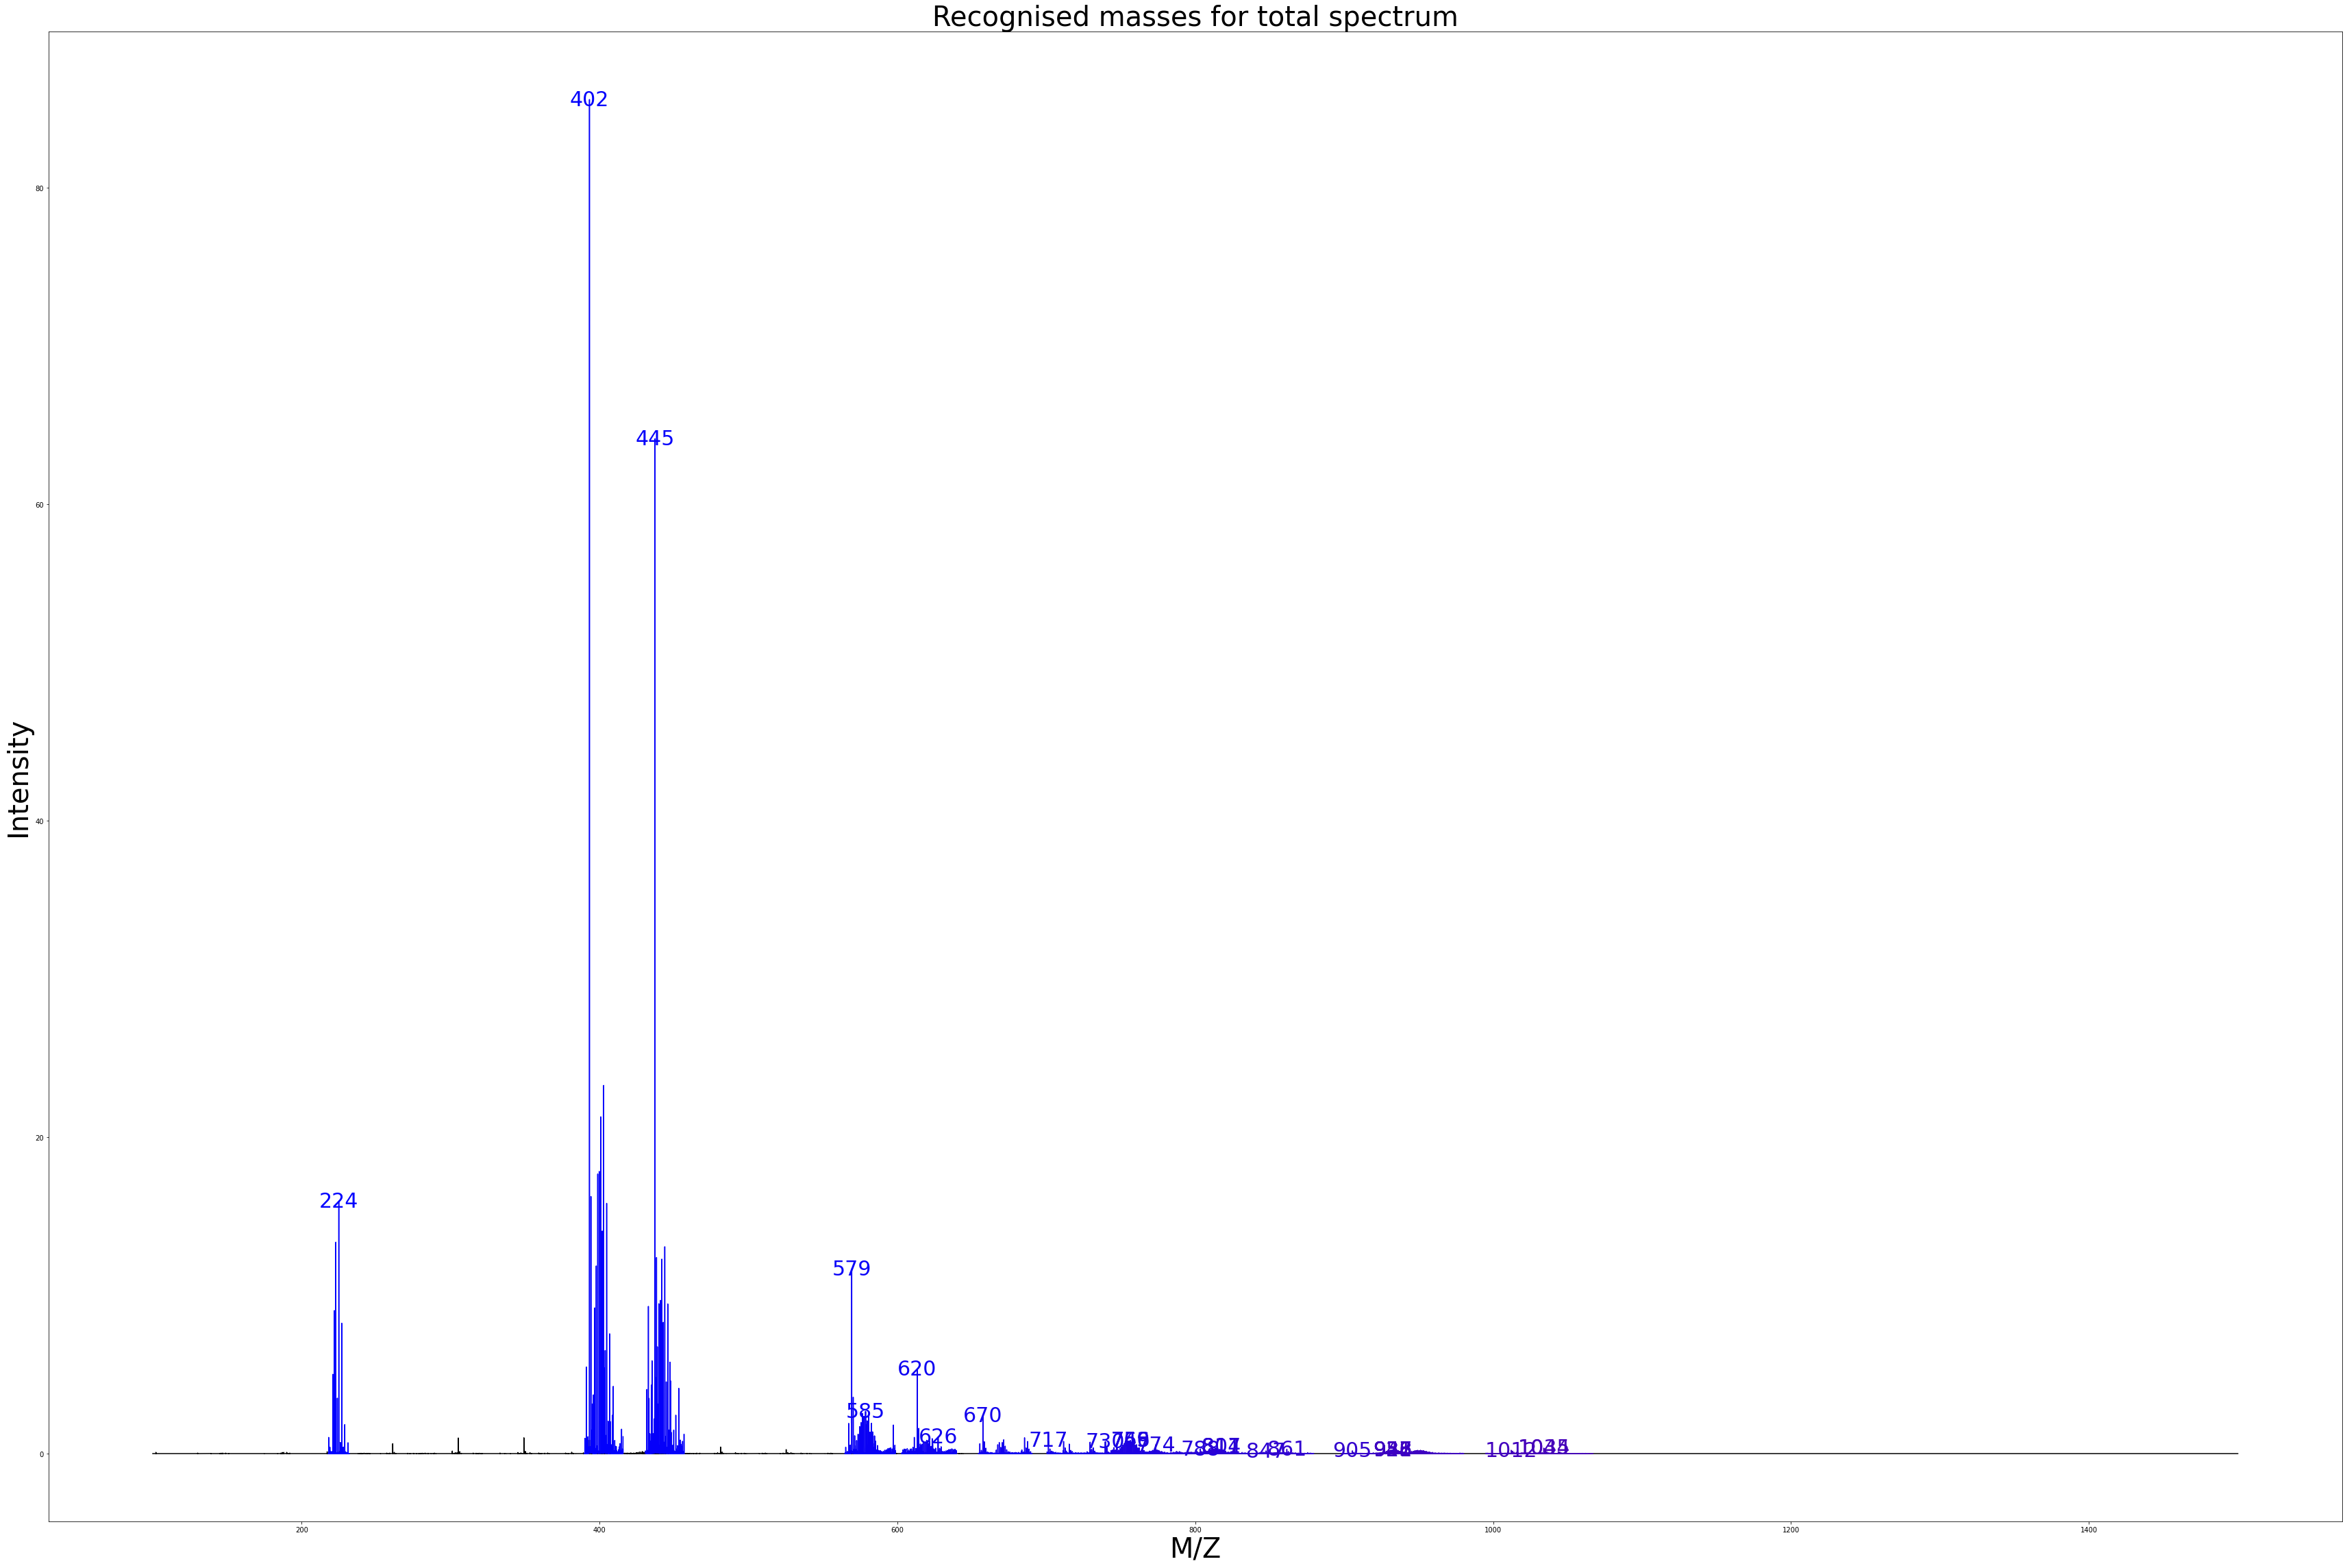

In [90]:
# Calculating total representation of found spectrum
count_entries = len(ranked)
fig, ax = plt.subplots(1, 1, figsize=(60, 40))
max_it = max(it)
ax.plot(mz, it/ max_it, color="black")
count: int = 0
c1: str = "blue"
c2: str = "red"
for mass, data in ranked.items():
    if data:
        colour = color_fader(c1, c2, mix=count / (count_entries + 1))
        it_n = (data[0]["spectrum"][1] / max_it) * 100
        ax.plot(
            data[0]["spectrum"][0], it_n, color=colour,
        )
        max_ind = np.argmax(it_n)
        height = it_n[max_ind]
        ax.text(
            data[0]["spectrum"][0][max_ind],
            height,
            round(mass),
            color=colour,
            horizontalalignment="center",
            verticalalignment="center",
            fontsize=30,
        )
        count += 1
ax.set_title(f"Recognised masses for total spectrum", fontsize=40)
ax.set_xlabel("M/Z", fontsize=40)
ax.set_ylabel("Intensity", fontsize=40)
if not os.path.exists(path):
    os.makedirs(path)
plt.savefig(f"{path}/total.png", dpi=300)

Mass 102.37 has found 0
Mass 107.902 has found 0
Mass 113.106 has found 0
Mass 130.386 has found 0
Mass 139.123 has found 0
Mass 147.468 has found 0
Mass 153.137 has found 0
Mass 164.257 has found 0
Mass 173.774 has found 0
Mass 182.321 has found 0
Mass 188.537 has found 0
Mass 201.179 has found 0
Mass 211.015 has found 0
Mass 217.191 has found 0
Mass 224.039 has found 1
Mass 231.098 has found 0
Mass 242.151 has found 0
Mass 252.125 has found 0
Mass 260.975 has found 0
Mass 272.995 has found 0
Mass 276.868 has found 0
Mass 281.287 has found 0
Mass 287.76 has found 0
Mass 296.901 has found 0
Mass 304.587 has found 0
Mass 317.575 has found 0
Mass 321.401 has found 0
Mass 327.2 has found 0
Mass 333.668 has found 0
Mass 340.16 has found 0
Mass 349.235 has found 0
Mass 357.91 has found 0
Mass 363.649 has found 0
Mass 375.134 has found 0
Mass 380.695 has found 0
Mass 387.697 has found 0
Mass 393.898 has found 0
Mass 402.326 has found 1
Mass 409.929 has found 0
Mass 415.059 has found 0
Mass 4

<ipython-input-91-d2a6997ea0b2>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize=(15, 5))


Mass 763.491 has found 4
Mass 773.506 has found 1
Mass 788.048 has found 3
Mass 803.607 has found 1
Mass 810.613 has found 3
Mass 816.529 has found 4
Mass 847.448 has found 1
Mass 861.344 has found 4
Mass 887.115 has found 0
Mass 905.489 has found 1
Mass 927.28 has found 1
Mass 932.688 has found 4
Mass 937.906 has found 6
Mass 945.58 has found 4
Mass 950.671 has found 7
Mass 1012.409 has found 5
Mass 1034.572 has found 9
Mass 1043.738 has found 1


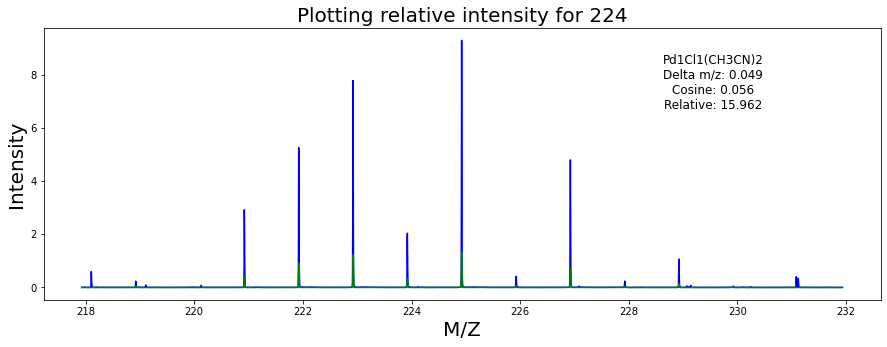

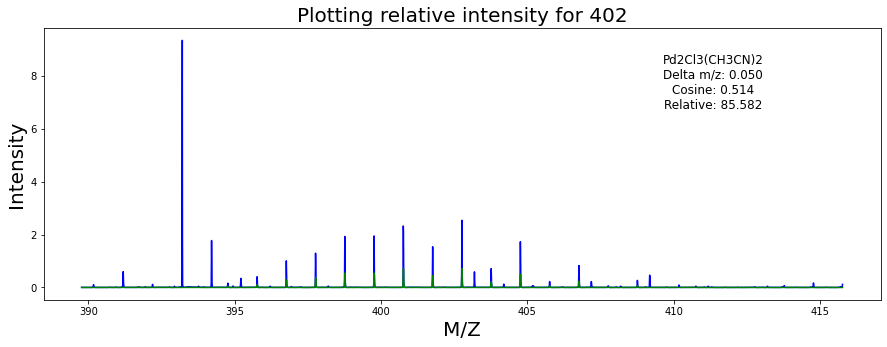

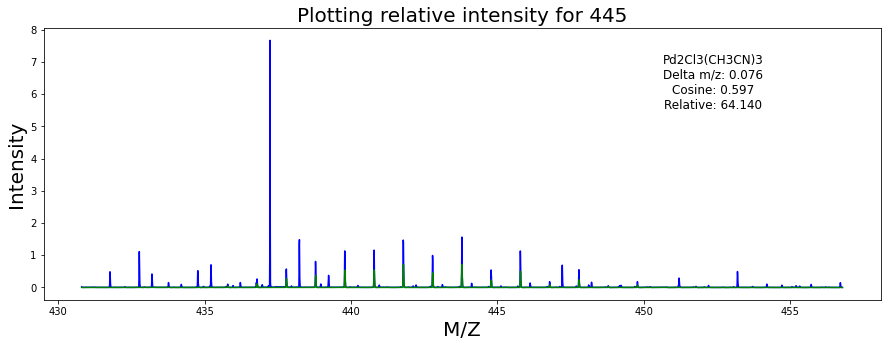

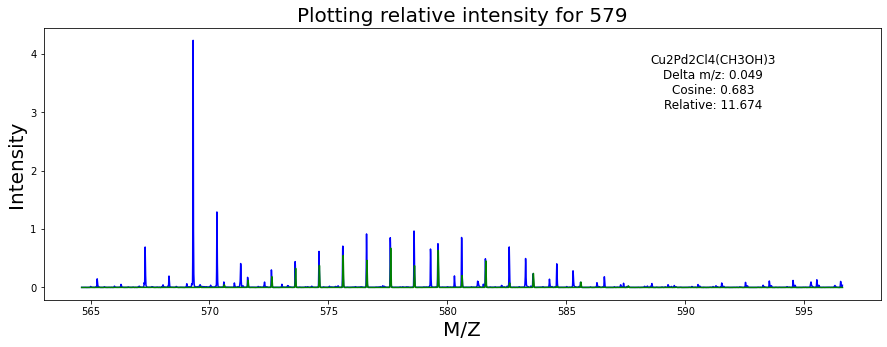

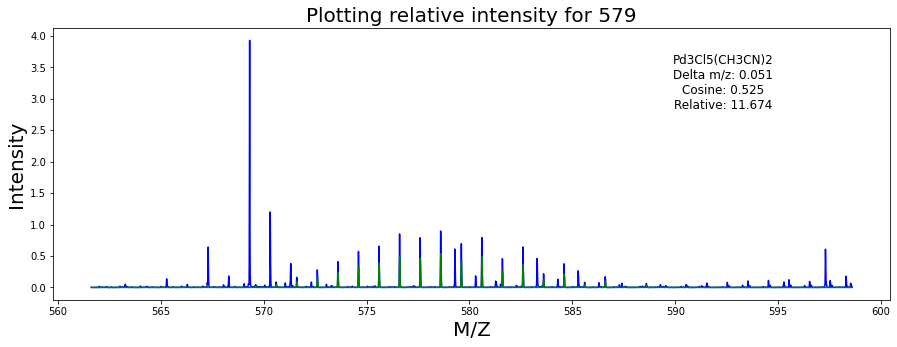

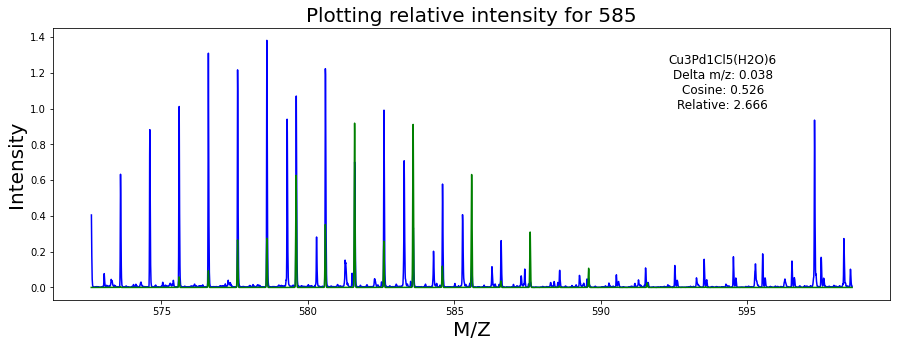

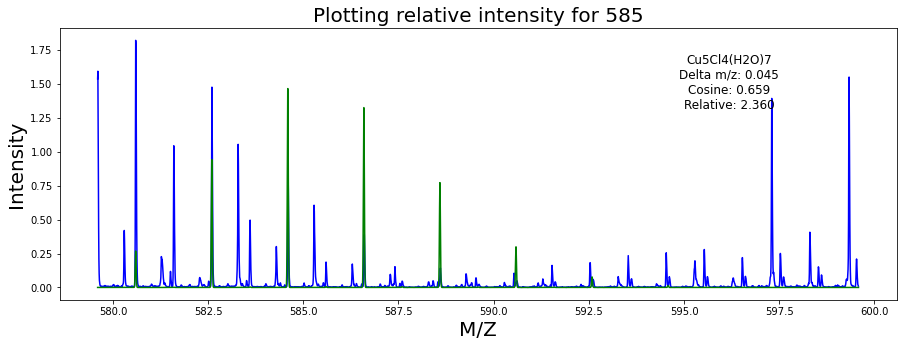

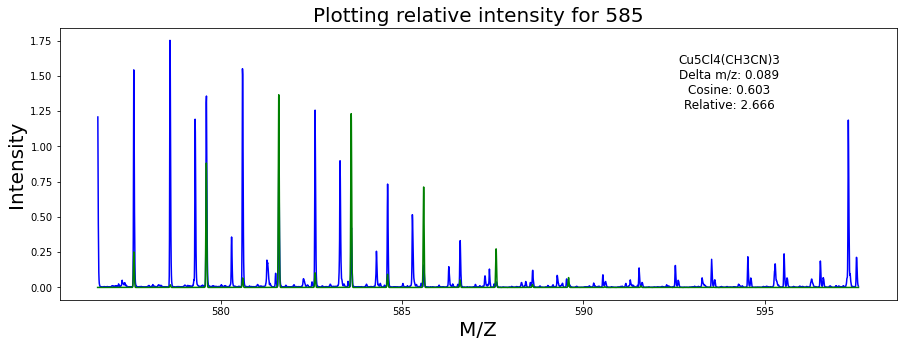

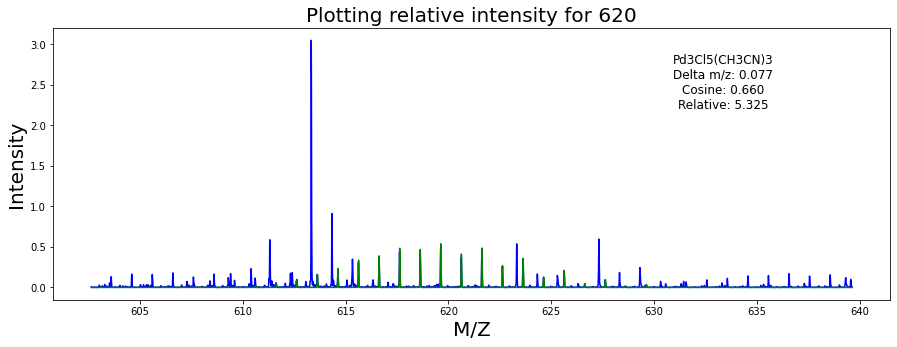

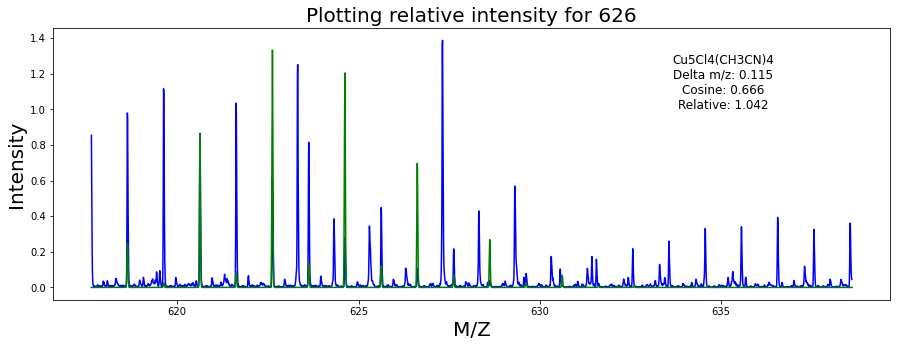

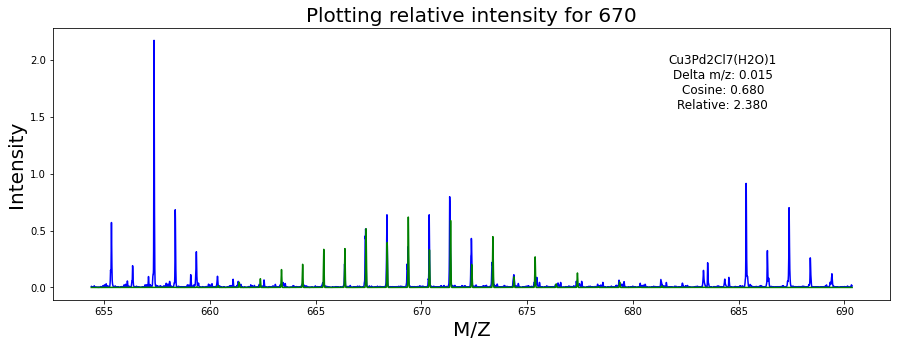

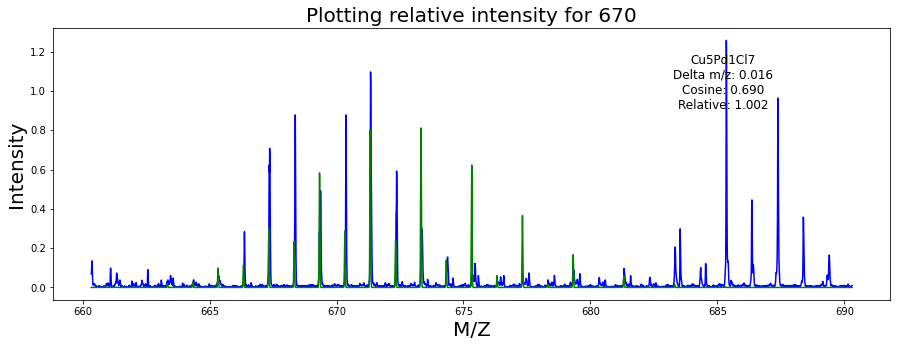

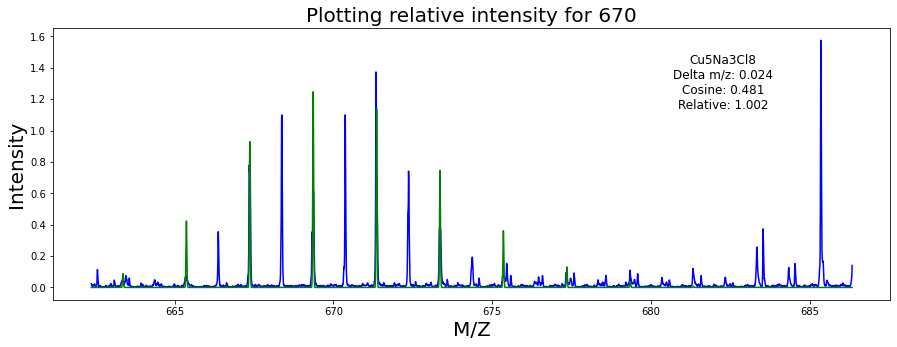

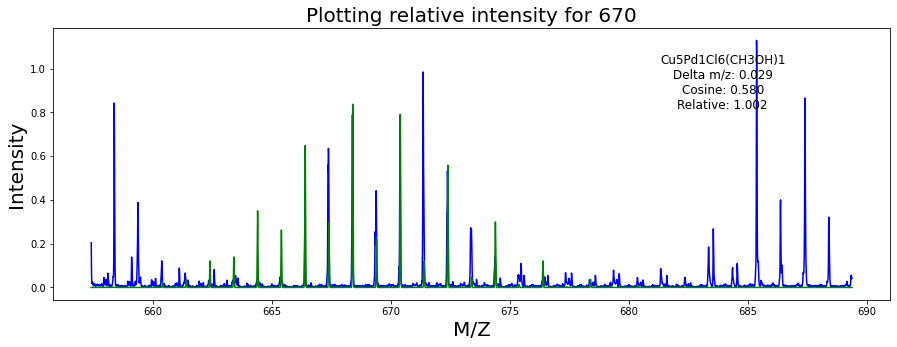

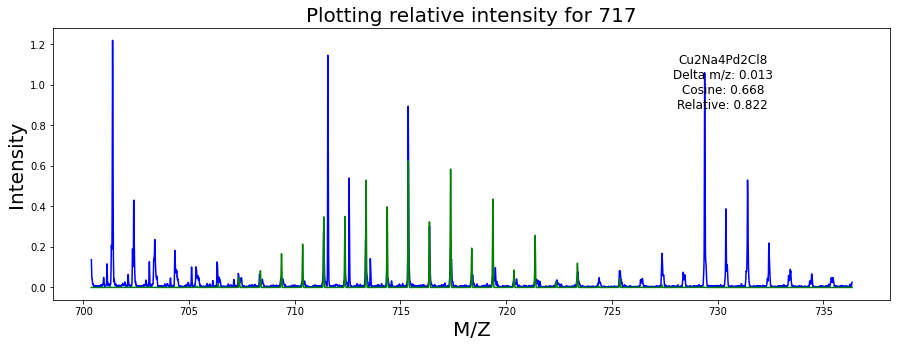

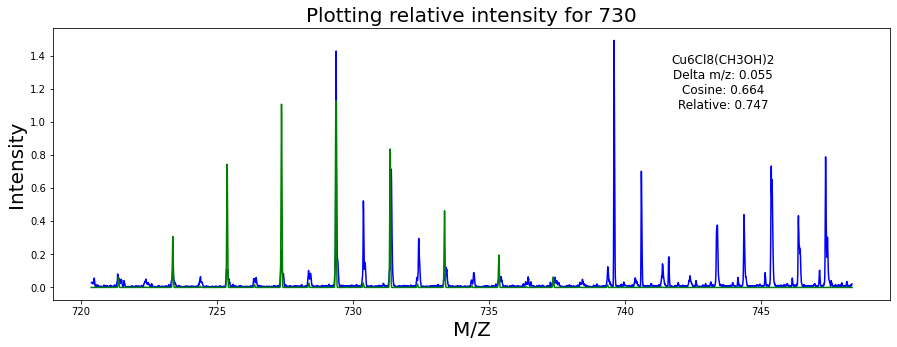

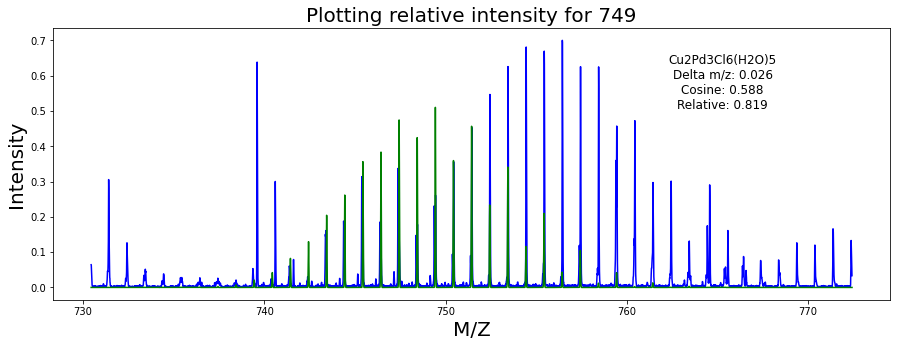

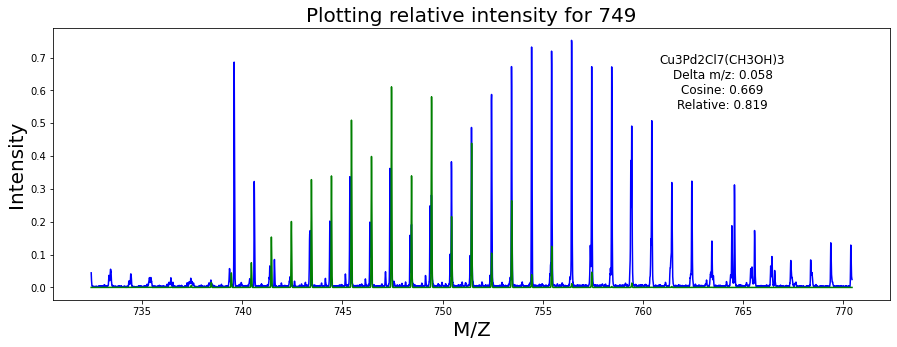

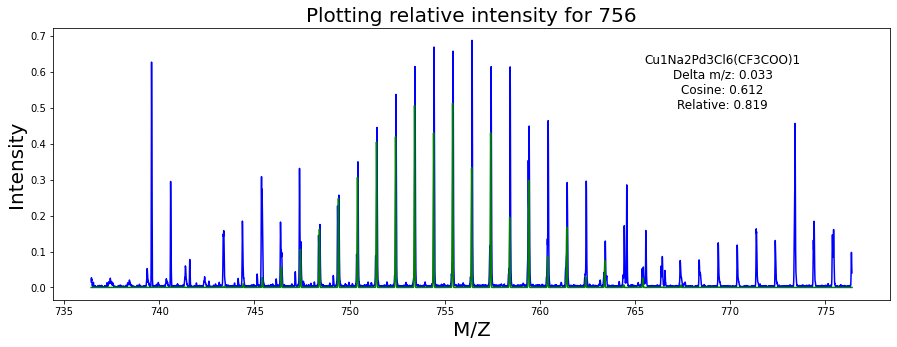

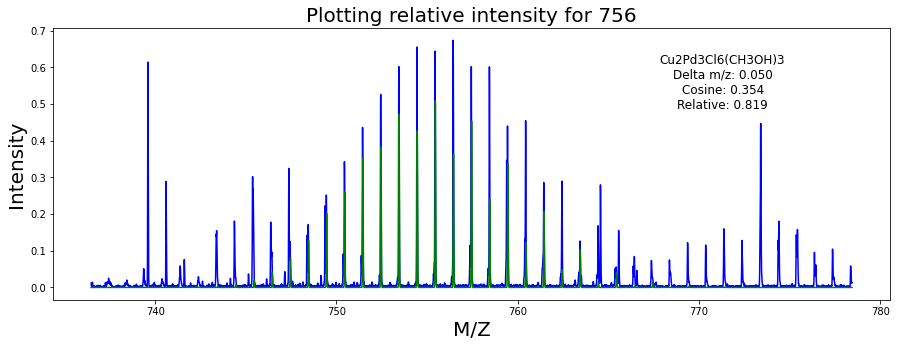

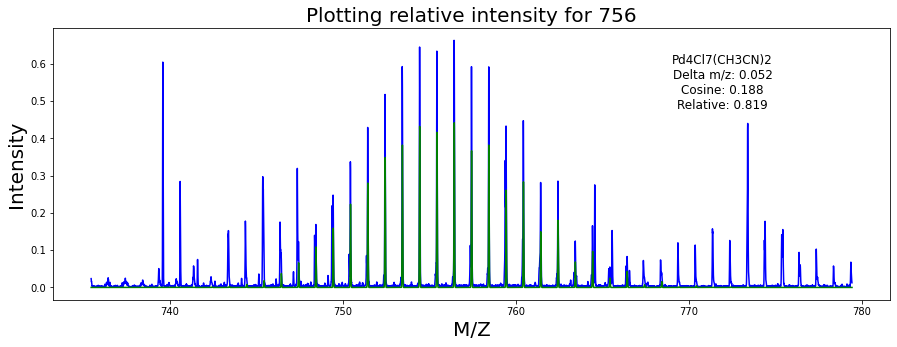

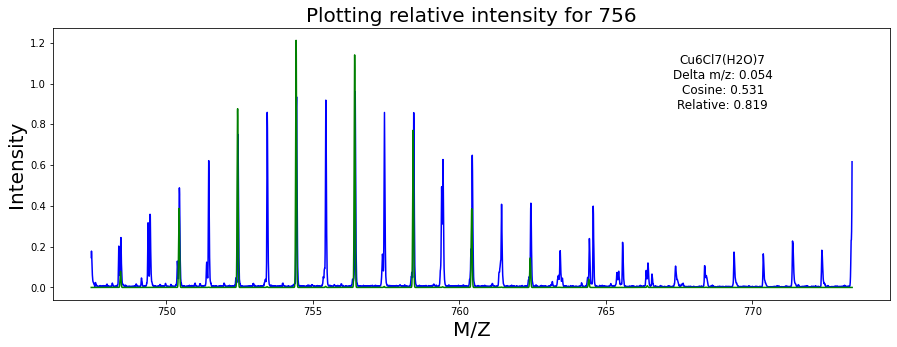

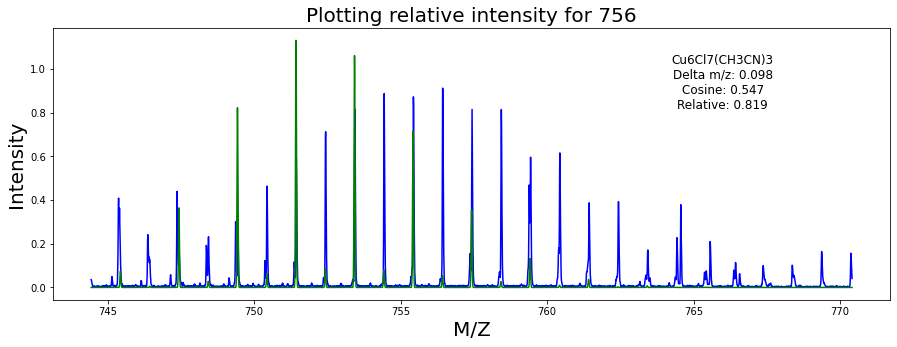

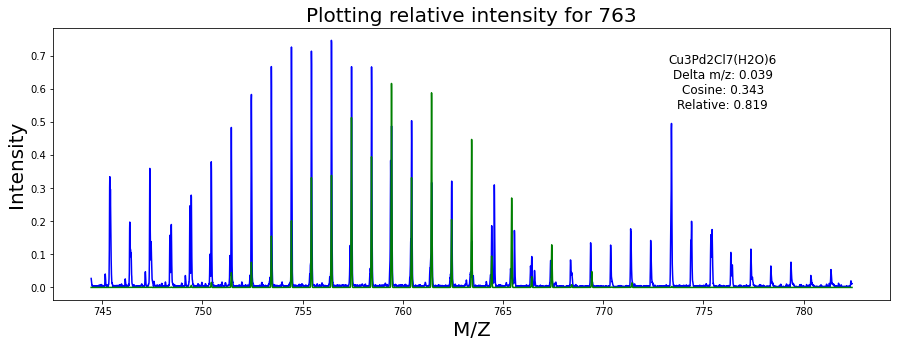

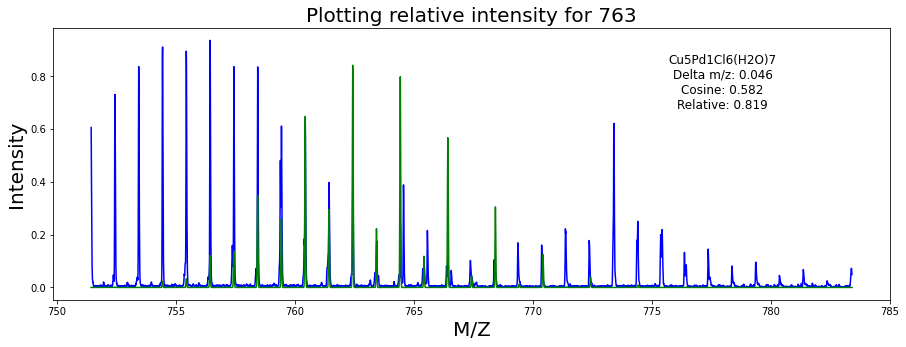

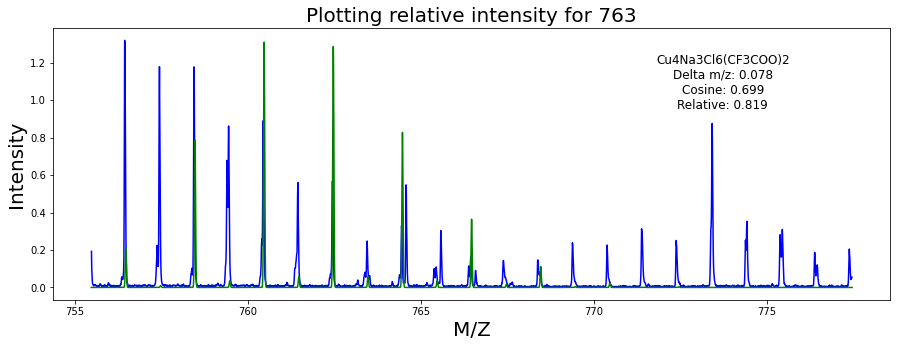

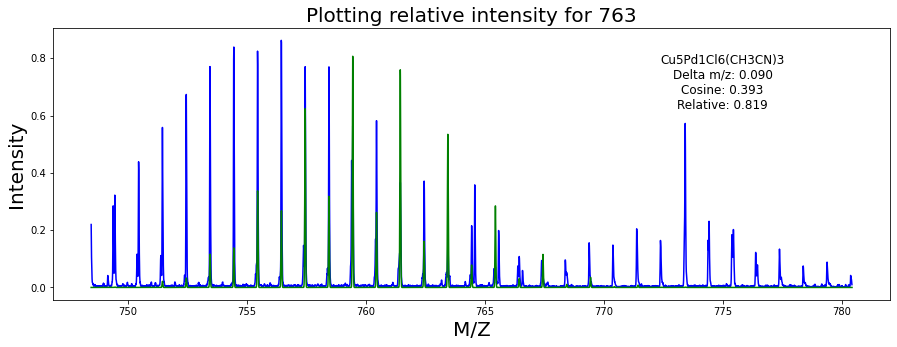

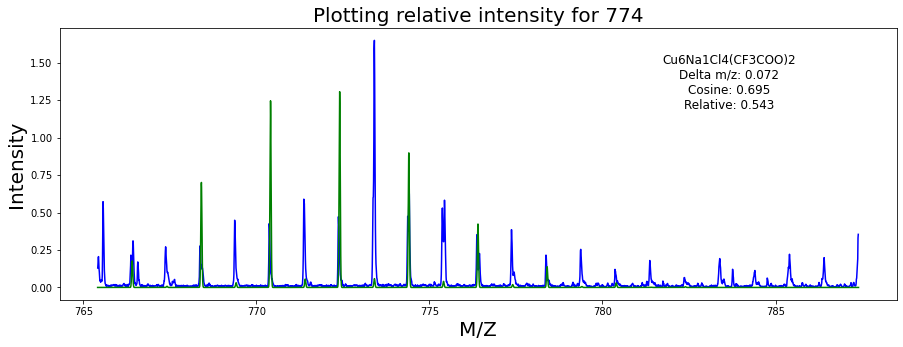

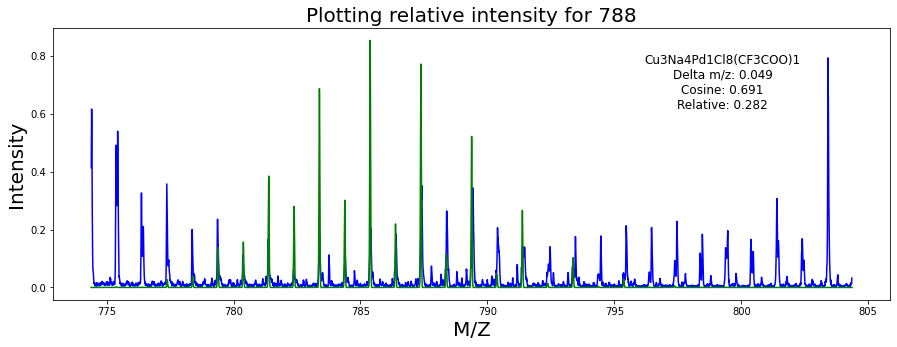

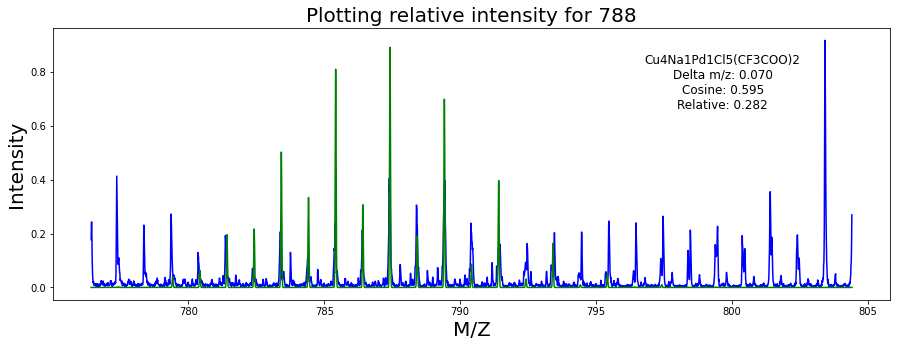

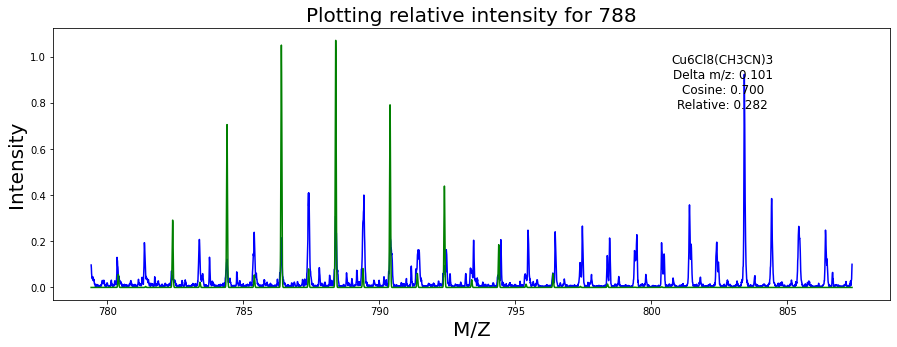

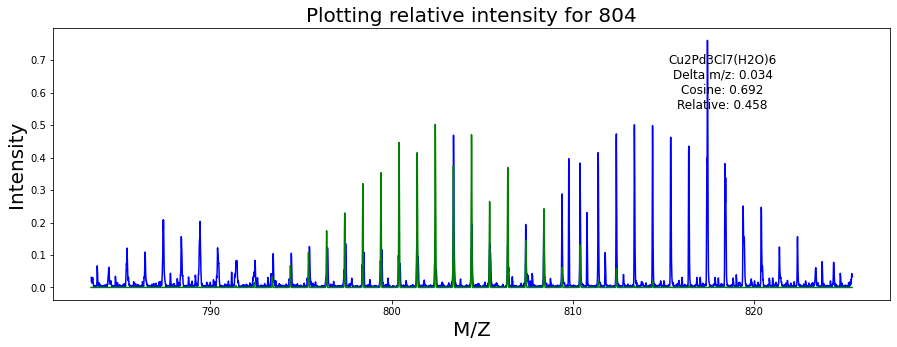

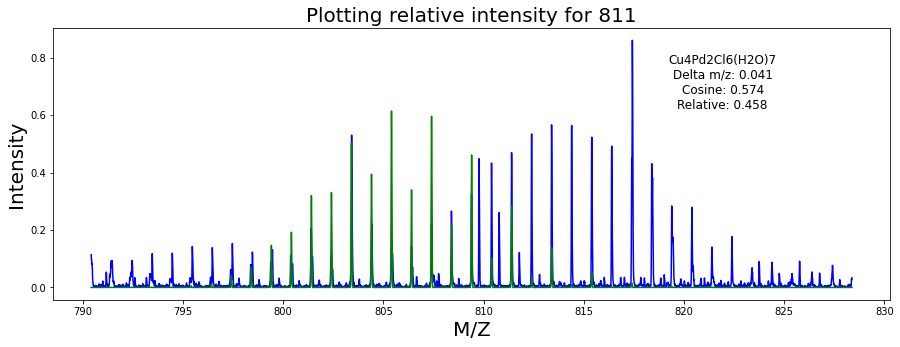

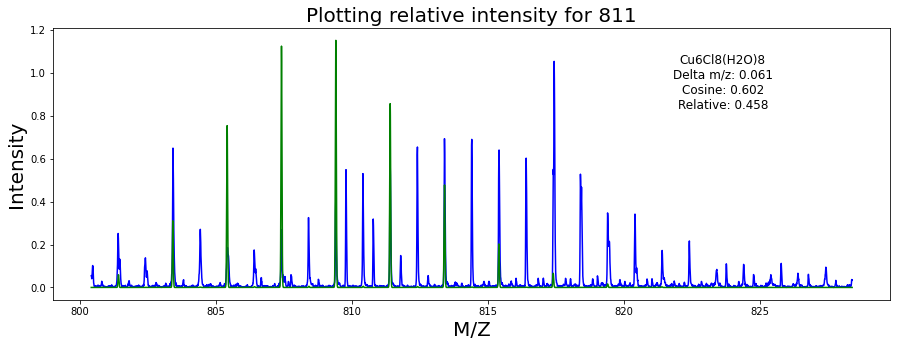

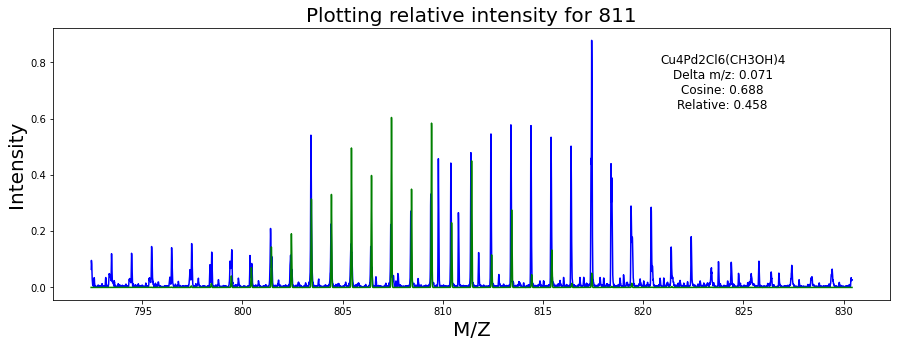

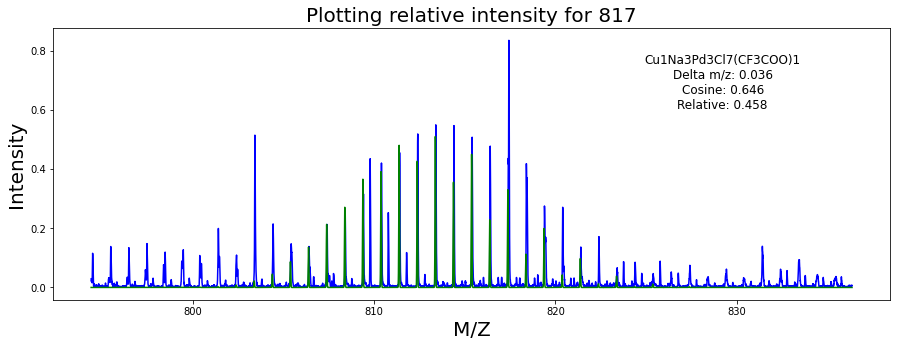

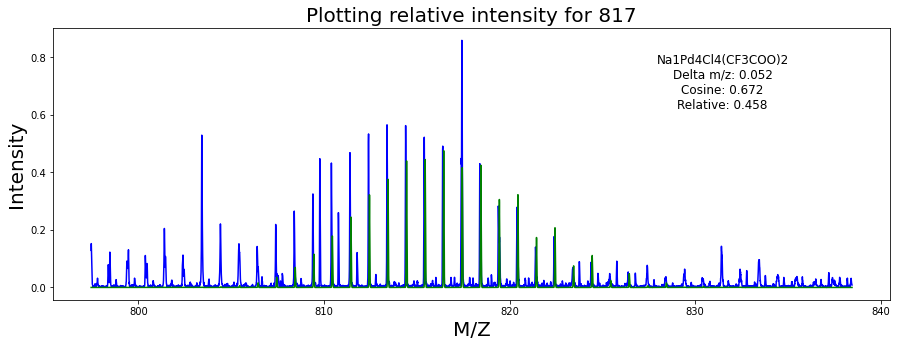

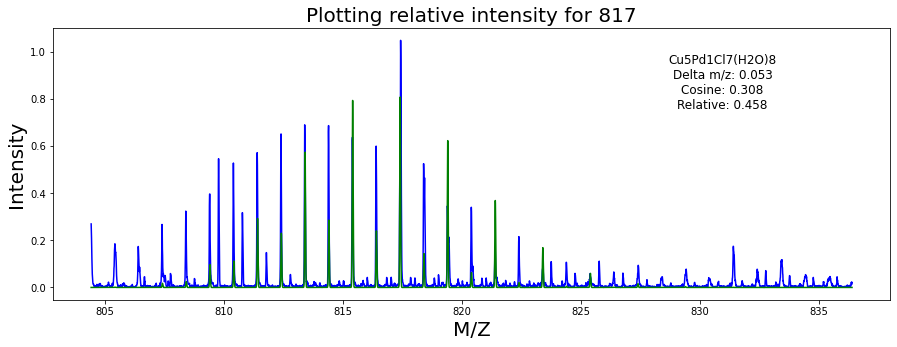

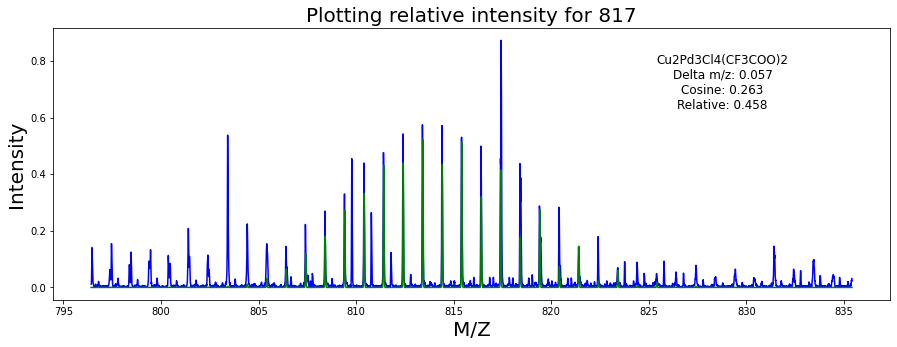

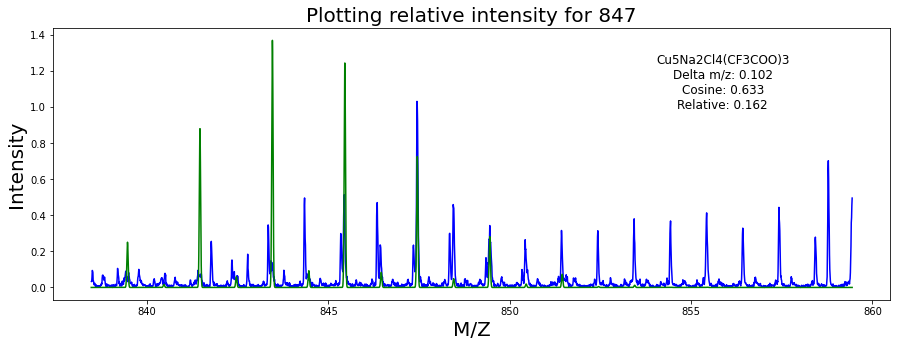

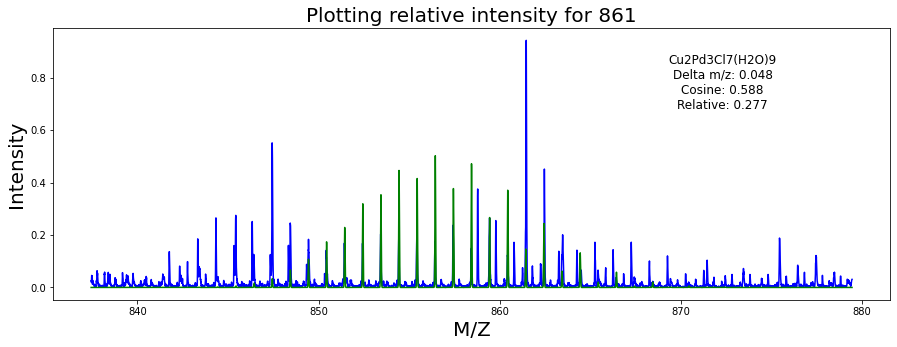

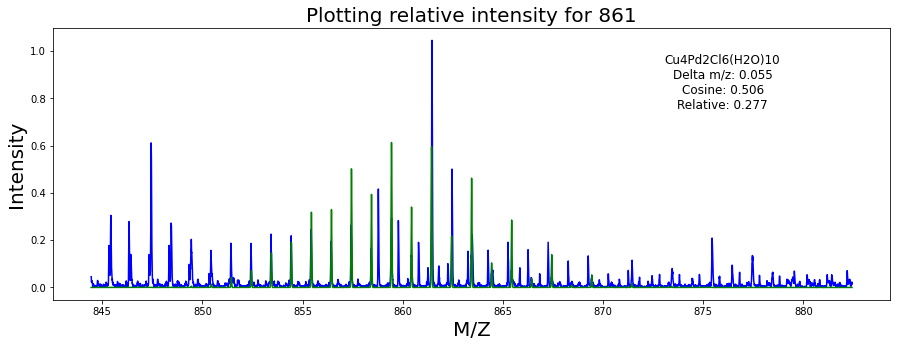

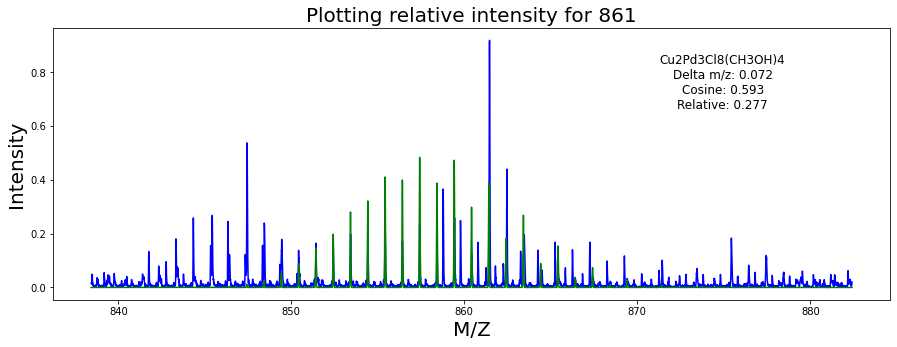

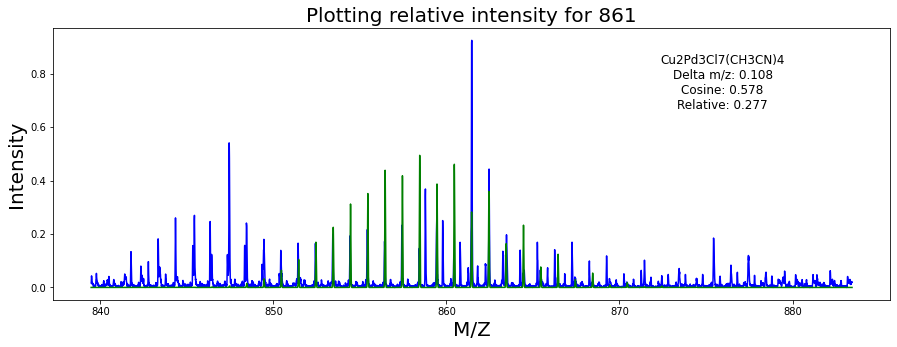

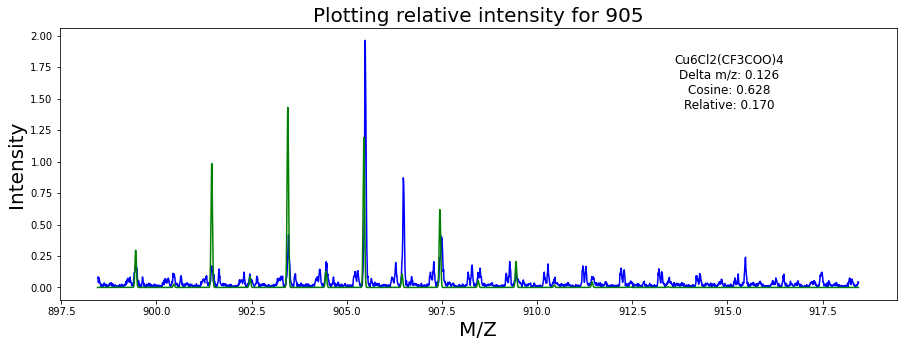

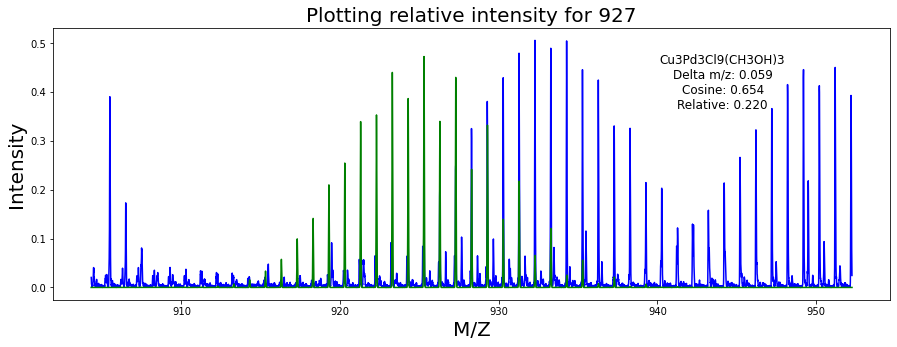

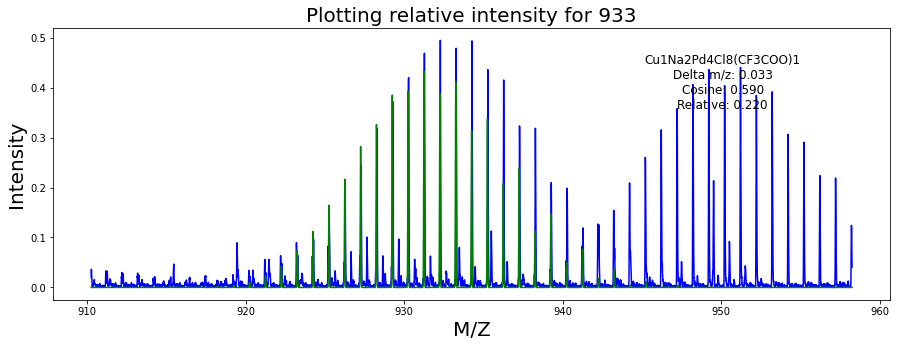

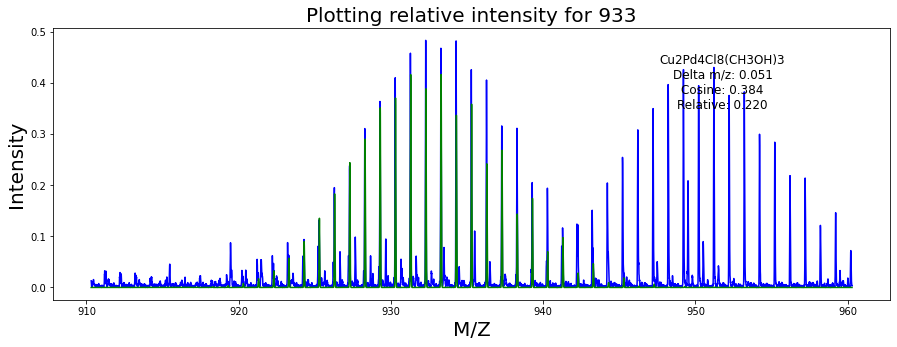

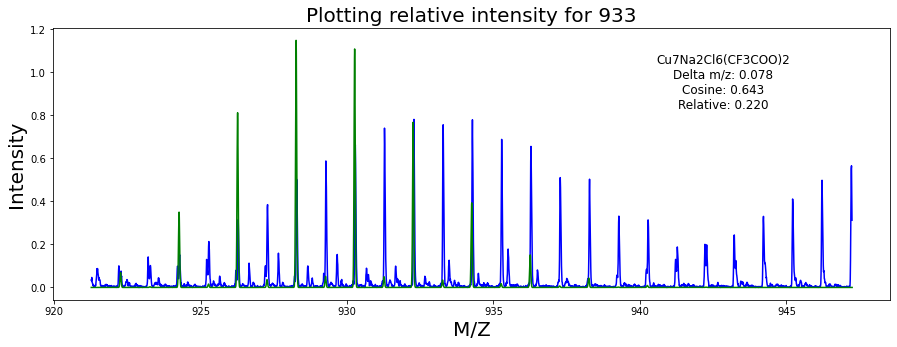

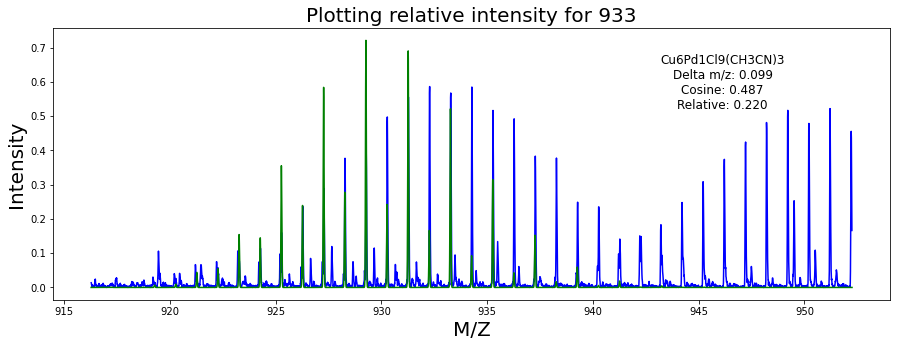

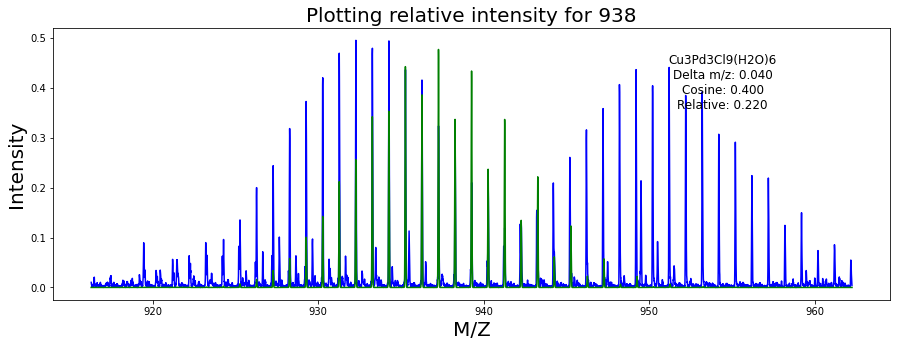

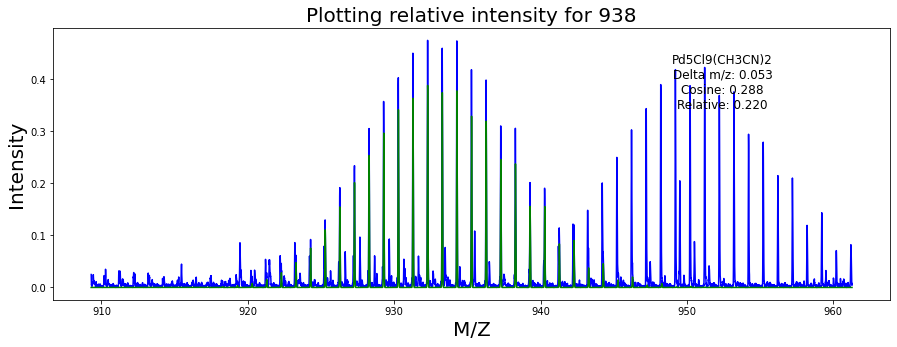

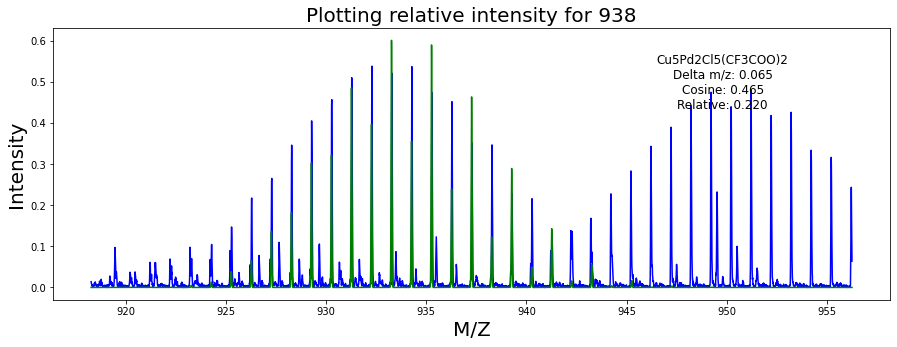

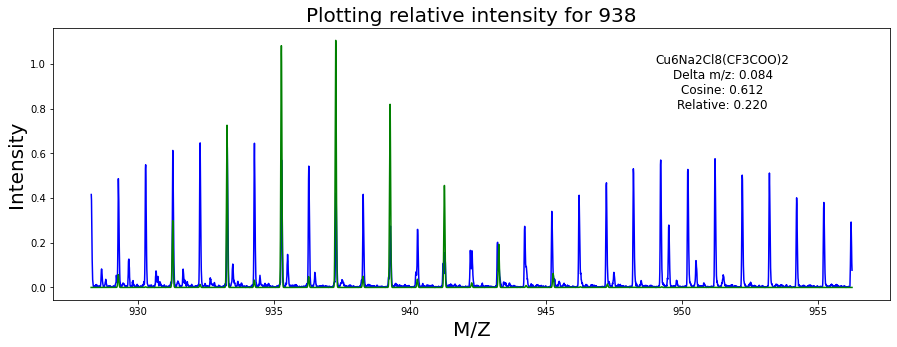

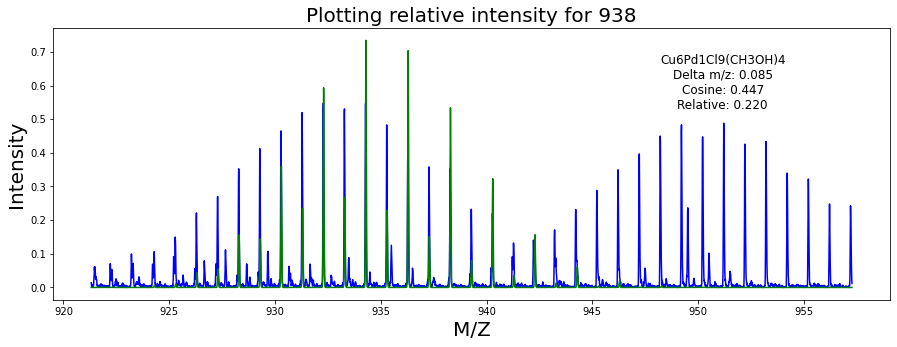

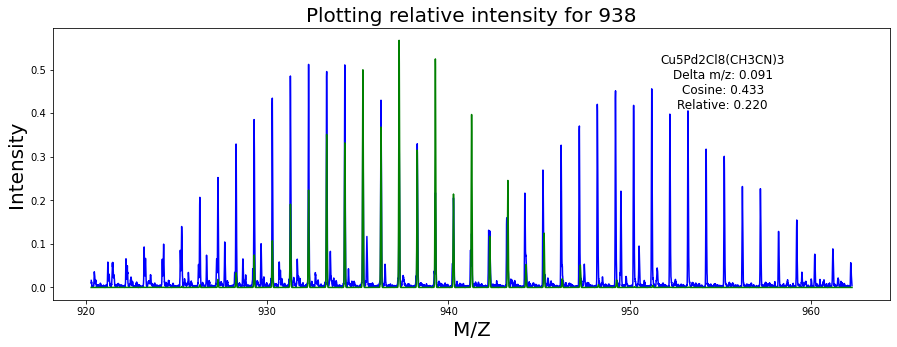

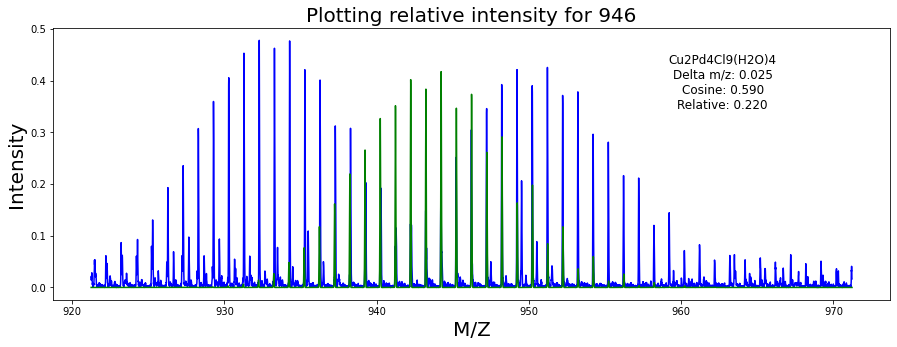

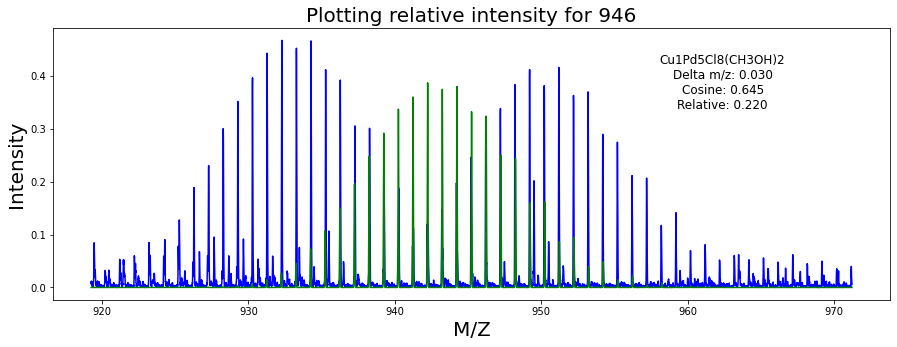

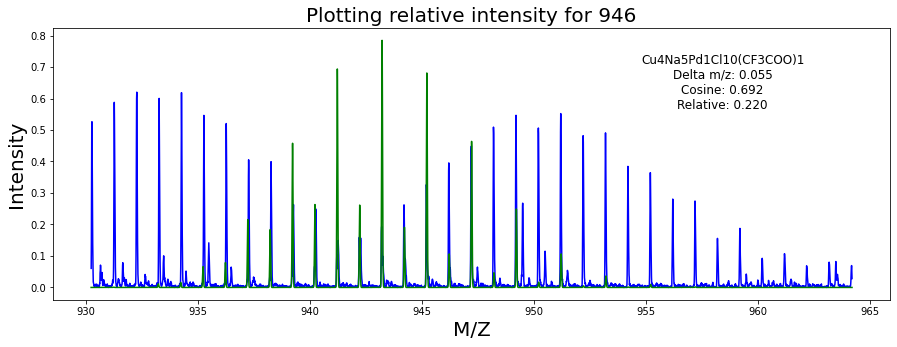

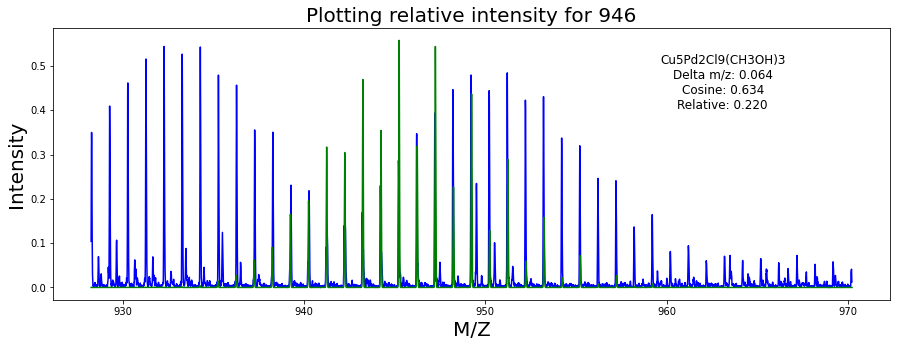

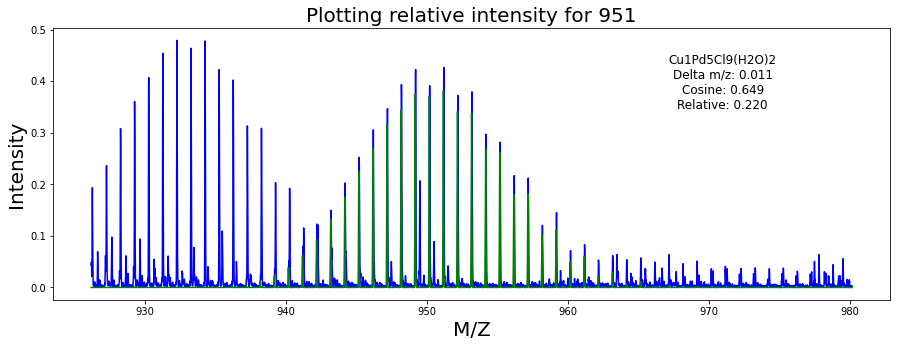

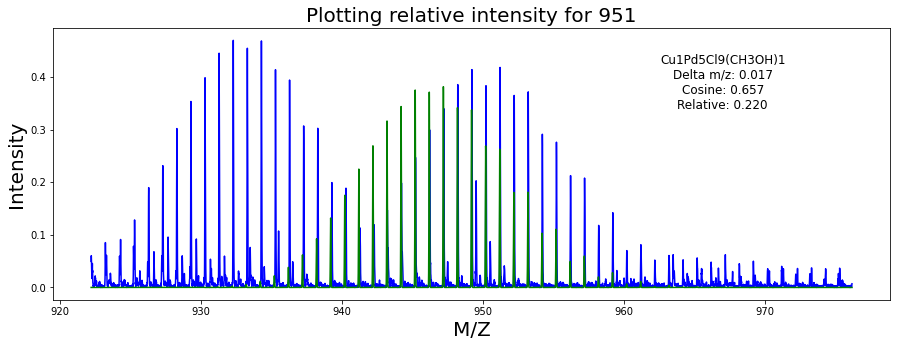

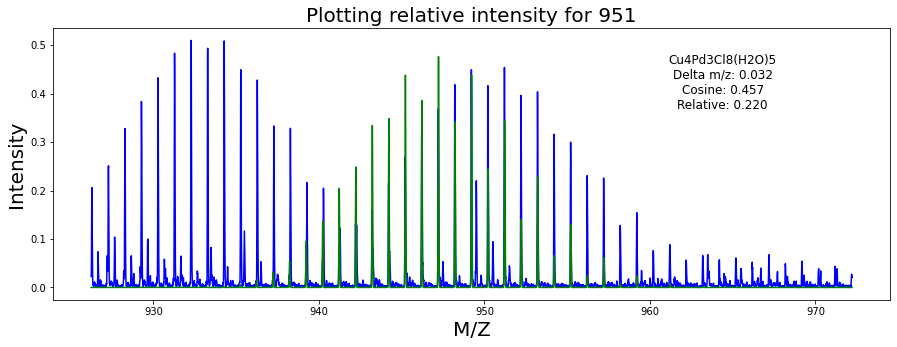

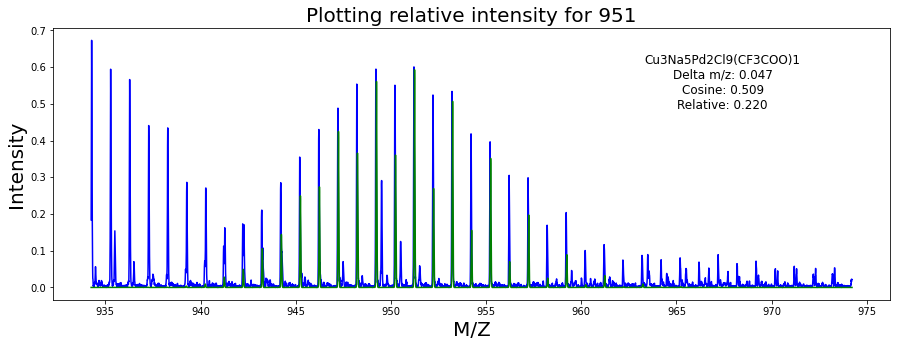

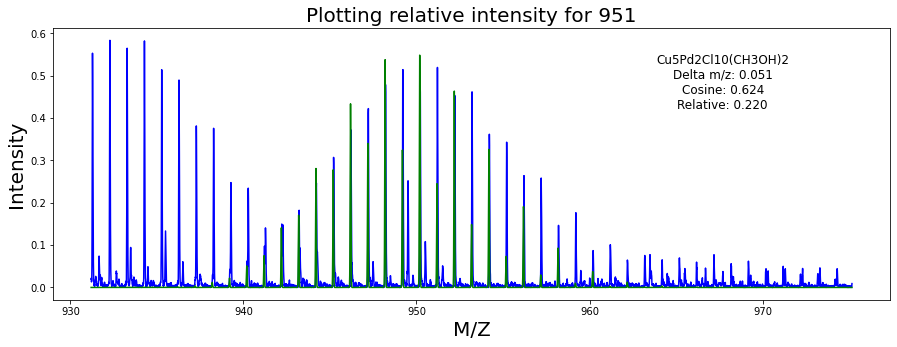

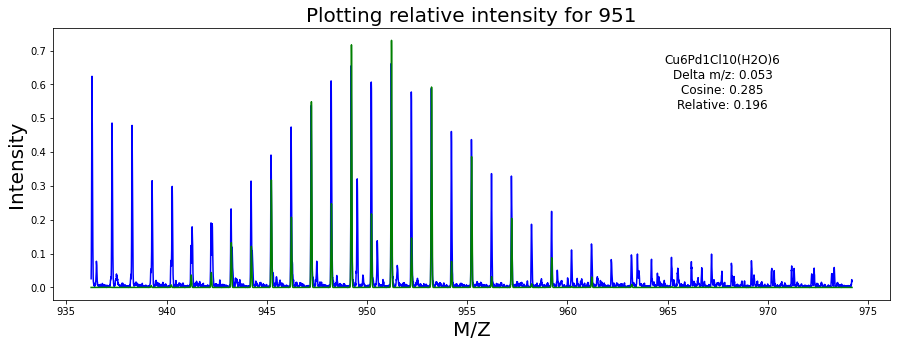

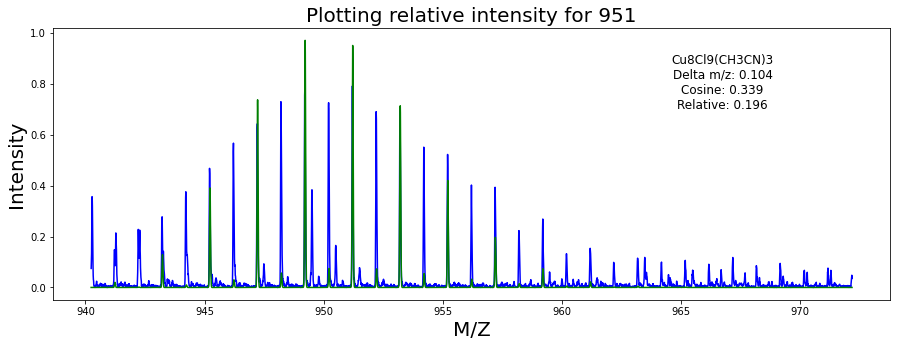

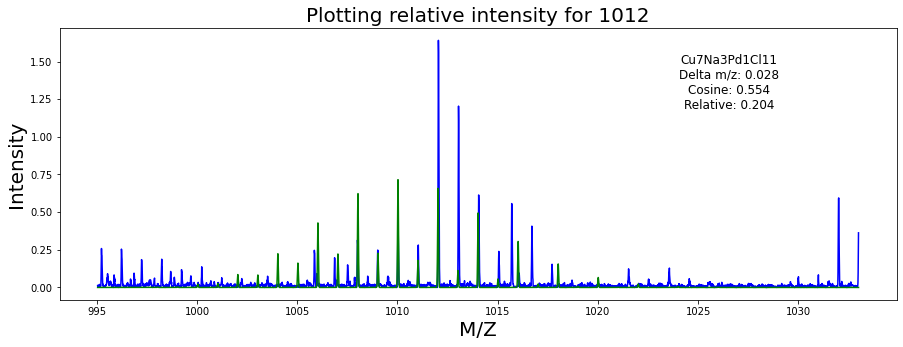

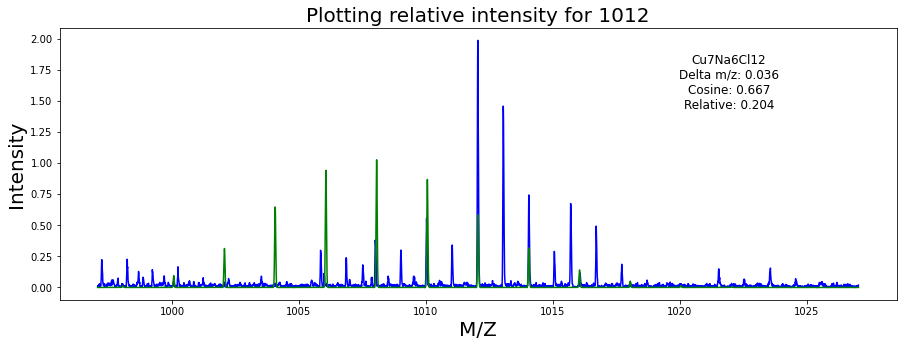

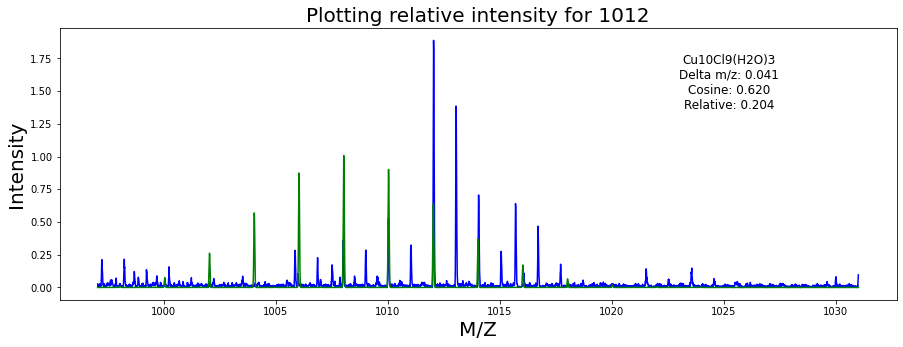

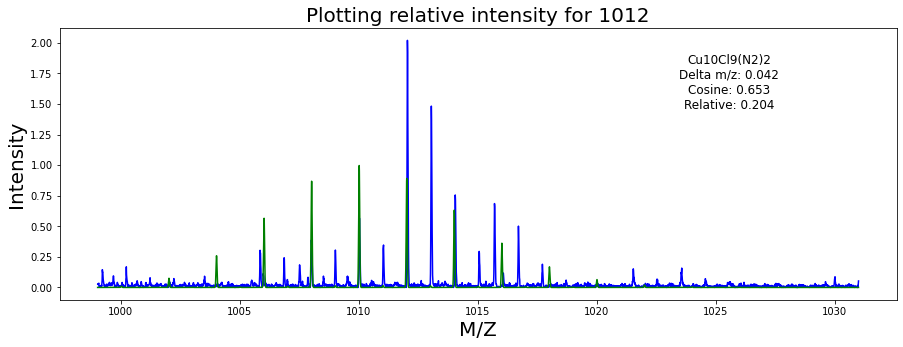

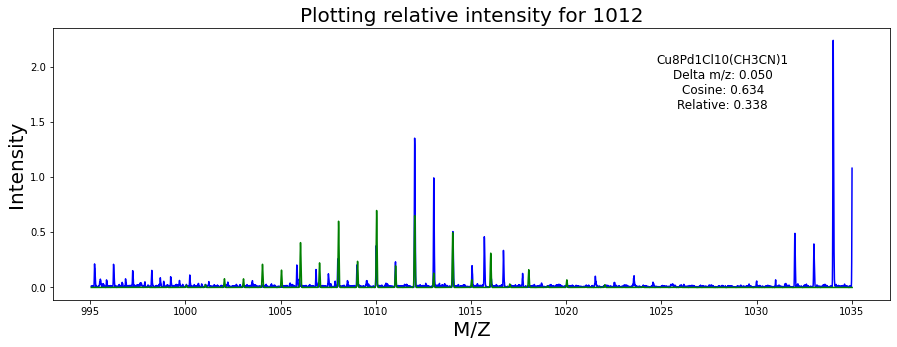

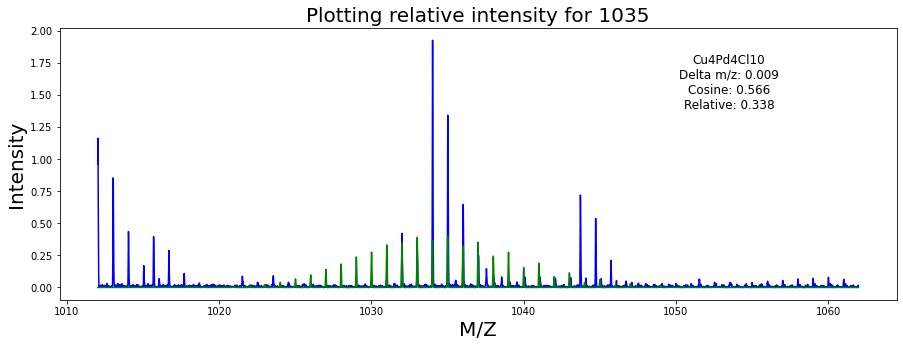

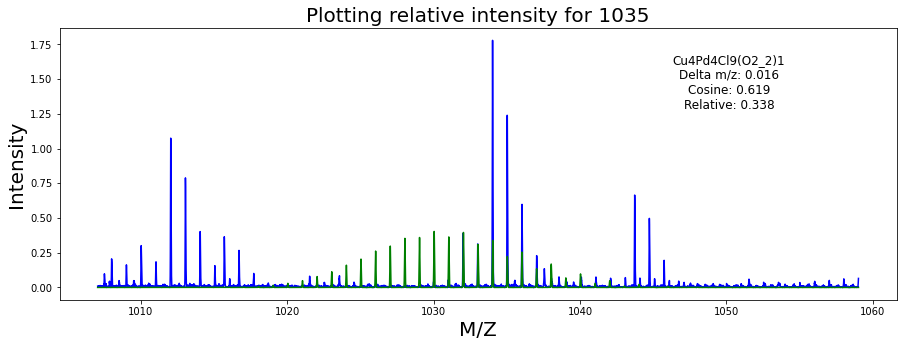

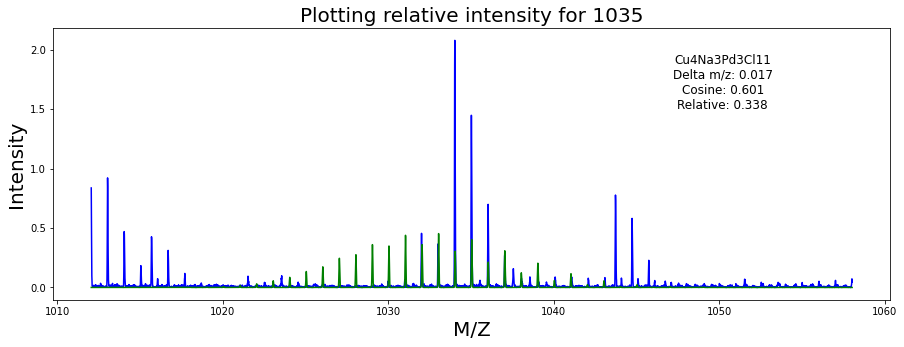

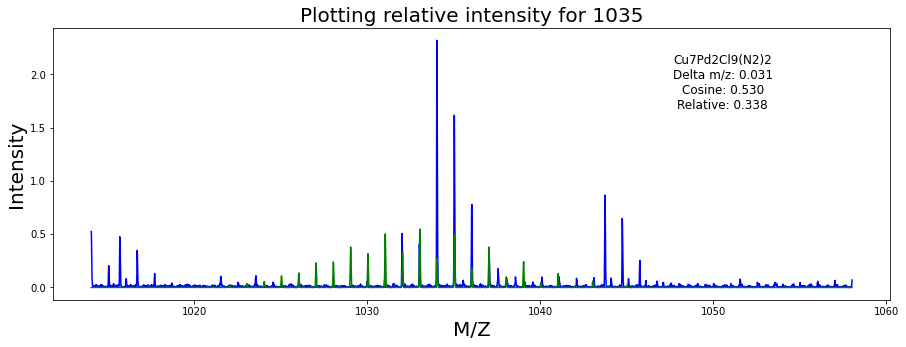

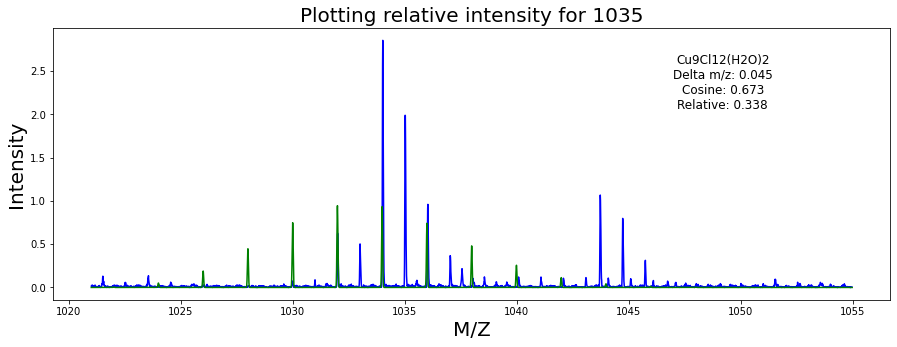

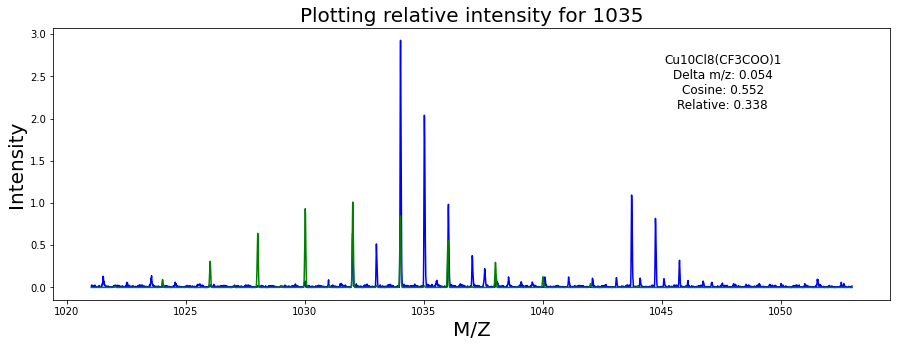

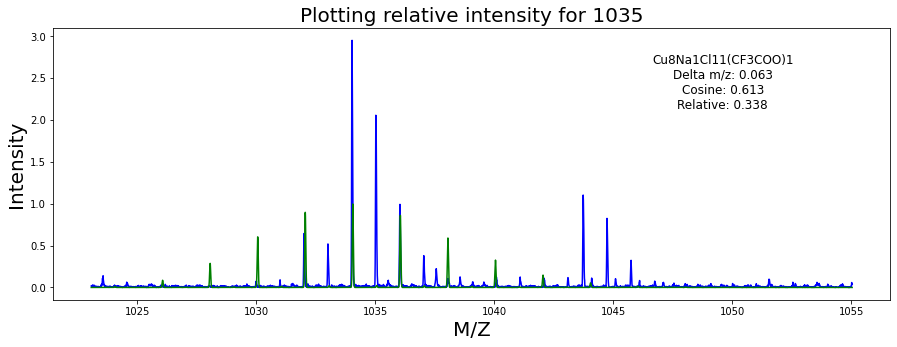

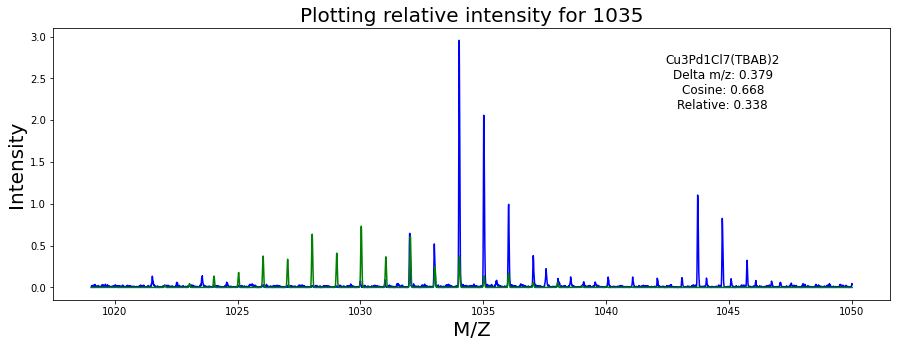

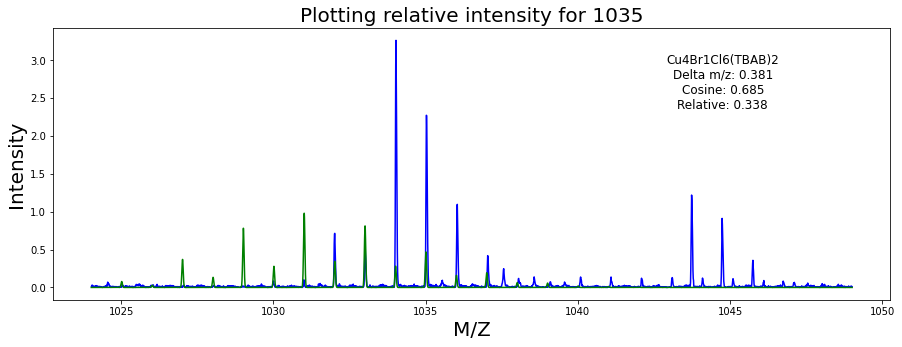

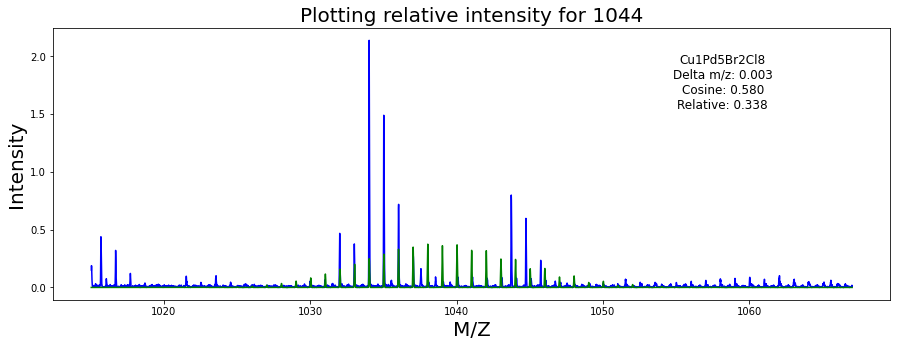

In [91]:
# Plotting results for individual recognised spectr
for mass, data in ranked.items():
    print(f"Mass {mass} has found {len(data)}")
    for match in data:
        fig, ax = plt.subplots(1, 1, figsize=(15, 5))

        ax.plot(
            match["spectrum"][0], norm(match["spectrum"][1]) * 100, color="blue",
        )
        ax.plot(match["mz"], norm(match["it"]) * 100, color="green")
        ax.set_xlabel("M/Z", fontsize=20)
        ax.set_ylabel("Intensity", fontsize=20)

        test_label = [
            f"{formal_formula(match['composition'])}",
            f"Delta m/z: {match['delta']:.3f}",
            f"Cosine: {match['metrics']['cosine']:.3f}",
            f"Relative: {match['relative']:.3f}",
        ]

        ax.text(
            0.8,
            0.8,
            "\n".join(test_label),
            color="black",
            horizontalalignment="center",
            verticalalignment="center",
            fontsize=12,
            transform=ax.transAxes,
        )
        ax.set_title(f"Plotting relative intensity for {int(mass+0.5)}", fontsize=20)
        cluster_path = f"{path}/{int(mass+0.5)}"
        if not os.path.exists(cluster_path):
            os.makedirs(cluster_path)
        plt.savefig(f"{cluster_path}/{match['formula']}.png", dpi=300)

In [93]:
# Making CSV report for individual recognised spectr
report = {
    "mass": [],
    "brutto": [],
    "brutto_formal": [],
    "cosine": [],
    "relative": [],
    "delta": []
}
variables = [
    "Pd1",
    "Pd2",
    "Cu1",
    "Cu2",
    "Na",
    "K",
    "O",
    "CF3COO",
    "TBAB",
    "OH",
    "Cl",
    "Br",
    "CH3CN",
    "CH3OH",
    "H2O",
    "N2",
    "O2_1",
    "O2_2"
]
for variable in variables:
    report[variable] = []
for mass, data in ranked.items():

    for match in data:
        composition = match["composition"]
        report["mass"].append(round(mass))
        report["brutto"].append(match["formula"])
        report["brutto_formal"].append(formal_formula(composition))
        report["cosine"].append(match["metrics"]["cosine"])
        report["relative"].append(match["relative"])
        report["delta"].append(match["delta"])
        for variable in variables:
            if variable in composition:
                report[variable].append(composition[variable])
            else:
                report[variable].append(0)
    pd.DataFrame(report).to_csv(f"{path}/{file_name}.csv")